# Group Members:
     - Phindulo Makhado - 1832463
     - Khanani Mathebula - 1847799
     - Rotondwa Mavhengani - 2114834

# Introduction

This YouTube Analytics dataset contains a wealth of information that can be used to study how to engage viewers and keep them coming back for more. With columns like thumbnail link, country codes, views, and user subscriptions added, this dataset provides valuable insights into how YouTube videos perform and what factors influence viewer engagement. Additionally, the average view percentage and watch time columns can be used to gauge the overall success of a video in terms of engagement

# Background Information about the Dataset 

This dataset can be used to study how viewers engage with YouTube videos. The data includes information on likes, dislikes, comments, shares, and subscribers gained or lost. This data can be used to improve video content and keep viewers coming back for more

**The main aim that we will be trying to achive by using this dataset is to understand how viewers interact with YouTube videos, and then furthermore rate/predict how well YouTube channel owners can make from various interactions**

# Project Notebook overview

      1:Import necessary libraries for preprocessing
      2:Further description of the features
      3:Check quality of data
      4:Clean the data set
      5:Eliminate data imbalance
      6:Checking the relationships of features
      4:Do Exploratory Visualizations
      5:Normal Distribution in data exploration
      6:Idea of Hypothesis Tests in data exploration
      7:Split the dataset into train, test and validation sets, and then predict the models
      8:Regression and classification model training
      9:Visualization of limitations

# ****Important to note: Please restart and run all the kernel if you would like to re-run cells which drop columns****

# Import libraries for preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import mutual_info_classif
import time
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import manifold, neighbors
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from timeit import default_timer as timer
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as metric
import warnings
from sklearn.model_selection import GridSearchCV
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


# Processing in the data

In [2]:
data = pd.read_csv('Aggregated_Metrics_By_Video.csv')
data.head()

Video                                        Video title  \
0        Total                                                NaN   
1  4OZip0cgOho  How I Would Learn Data Science (If I Had to St...   
2  78LjdAAw0wA                  100K Channel Update + AMA Stream!   
3  hO_YKK_0Qck  Uber Driver to Machine Learning Engineer in 9 ...   
4  uXLnbdHMf8w          Why I'm Starting Data Science Over Again.   

  Video pub­lish time  Com­ments ad­ded  Shares  Dis­likes   Likes  \
0                 NaN             14197   39640       3902  225021   
1         May 8, 2020               907    9583        942   46903   
2        Nov 12, 2020               412       4          4     130   
3        Jul 16, 2020               402     152         15     881   
4        Aug 29, 2020               375     367         22    2622   

   Sub­scribers lost  Sub­scribers gained  RPM (USD)  CPM (USD)  \
0              45790               229241      5.276     11.990   
1                451                46904      6.353     12.835   
2                 15                   12      2.668      6.259   
3                  9                  198      9.516     11.695   
4                 40                 1957      3.143      7.943   

   Av­er­age per­cent­age viewed (%) Av­er­age view dur­a­tion    Views  \
0                              26.61                   0:03:25  5568487   
1                              36.65                   0:03:09  1253559   
2                               6.26                   0:05:14     2291   
3                              15.12                   0:10:21    21350   
4                              33.41                   0:02:36    49564   

   Watch time (hours)  Sub­scribers  Your es­tim­ated rev­en­ue (USD)  \
0         317602.3536        183451                         29068.652   
1          65850.7042         46453                          7959.533   
2            200.2966            -3                             6.113   
3           3687.3387           189                           202.963   
4           2148.3110          1917                           155.779   

   Im­pres­sions  Im­pres­sions click-through rate (%)  
0      100954064                                  3.16  
1       26498799                                  3.14  
2         188318                                  0.72  
3         442334                                  2.53  
4         521185                                  4.01

# Checking Data Quality

In [3]:
data.describe().T

count           mean           std  \
Com­ments ad­ded                      224.0     126.750000  9.487324e+02   
Shares                                224.0     353.924107  2.736322e+03   
Dis­likes                             224.0      34.839286  2.686683e+02   
Likes                                 224.0    2008.919643  1.538727e+04   
Sub­scribers lost                     224.0     217.620536  3.058767e+03   
Sub­scribers gained                   224.0    1608.084821  1.562883e+04   
RPM (USD)                             224.0       4.442040  1.789148e+00   
CPM (USD)                             222.0      11.442779  3.334781e+00   
Av­er­age per­cent­age viewed (%)     224.0      34.087277  1.511875e+01   
Views                                 224.0   49716.450893  3.810302e+05   
Watch time (hours)                    224.0    2835.711522  2.166257e+04   
Sub­scribers                          224.0    1390.464286  1.264725e+04   
Your es­tim­ated rev­en­ue (USD)      224.0     259.537433  2.011119e+03   
Im­pres­sions                         224.0  901357.254464  6.967916e+06   
Im­pres­sions click-through rate (%)  224.0       3.084152  1.670448e+00   

                                           min           25%          50%  \
Com­ments ad­ded                        0.0000     18.000000      37.0000   
Shares                                  0.0000     19.000000      46.5000   
Dis­likes                               0.0000      1.000000       4.0000   
Likes                                   1.0000    163.500000     342.5000   
Sub­scribers lost                       0.0000      2.000000       7.0000   
Sub­scribers gained                     0.0000     27.000000      70.0000   
RPM (USD)                               0.0000      3.220750       4.3345   
CPM (USD)                               5.4390      9.379500      11.1695   
Av­er­age per­cent­age viewed (%)       5.2300     23.602500      35.1200   
Views                                  60.0000   3940.000000    8347.5000   
Watch time (hours)                      1.0684    177.037125     397.8522   
Sub­scribers                          -21.0000     19.750000      62.5000   
Your es­tim­ated rev­en­ue (USD)        0.0000     12.208250      32.5955   
Im­pres­sions                         365.0000  99471.000000  154192.5000   
Im­pres­sions click-through rate (%)    0.4900      1.925000       2.8950   

                                               75%           max  
Com­ments ad­ded                          66.25000  1.419700e+04  
Shares                                   114.25000  3.964000e+04  
Dis­likes                                 11.00000  3.902000e+03  
Likes                                    716.00000  2.250210e+05  
Sub­scribers lost                         14.00000  4.579000e+04  
Sub­scribers gained                      245.50000  2.292410e+05  
RPM (USD)                                  5.37225  1.038700e+01  
CPM (USD)                                 12.90100  3.778600e+01  
Av­er­age per­cent­age viewed (%)         43.46250  7.660000e+01  
Views                                  18368.75000  5.568487e+06  
Watch time (hours)                      1145.62140  3.176024e+05  
Sub­scribers                             230.50000  1.834510e+05  
Your es­tim­ated rev­en­ue (USD)          96.81475  2.906865e+04  
Im­pres­sions                         289488.50000  1.009541e+08  
Im­pres­sions click-through rate (%)       3.97500  1.151000e+01

In [4]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows)
print("number of columns", num_cols)

number of rows/entries: 224
number of columns 19


In [5]:
duplicate = data[data.duplicated()].shape[0]
missing_entry = data.isnull().sum().sum()
print("Duplicate Overall Values are:", duplicate)
print("Missing Overall Values are:", missing_entry)

Duplicate Overall Values are: 0
Missing Overall Values are: 4


### Removing Duplicate Values and Missing entries

In [6]:
data = data.dropna()
missing_entry_after = data.isnull().sum().sum()
print("Missing New Values are:", missing_entry_after)

Missing New Values are: 0


In [7]:
data.shape[0]

221

In [8]:
data.head()

Video                                        Video title  \
1  4OZip0cgOho  How I Would Learn Data Science (If I Had to St...   
2  78LjdAAw0wA                  100K Channel Update + AMA Stream!   
3  hO_YKK_0Qck  Uber Driver to Machine Learning Engineer in 9 ...   
4  uXLnbdHMf8w          Why I'm Starting Data Science Over Again.   
5  Xgg7dIKys9E  Interview with the Director of AI Research @ N...   

  Video pub­lish time  Com­ments ad­ded  Shares  Dis­likes  Likes  \
1         May 8, 2020               907    9583        942  46903   
2        Nov 12, 2020               412       4          4    130   
3        Jul 16, 2020               402     152         15    881   
4        Aug 29, 2020               375     367         22   2622   
5         Aug 5, 2020               329     118         15    590   

   Sub­scribers lost  Sub­scribers gained  RPM (USD)  CPM (USD)  \
1                451                46904      6.353     12.835   
2                 15                   12      2.668      6.259   
3                  9                  198      9.516     11.695   
4                 40                 1957      3.143      7.943   
5                 11                  161      2.973      7.425   

   Av­er­age per­cent­age viewed (%) Av­er­age view dur­a­tion    Views  \
1                              36.65                   0:03:09  1253559   
2                               6.26                   0:05:14     2291   
3                              15.12                   0:10:21    21350   
4                              33.41                   0:02:36    49564   
5                               9.55                   0:04:37    13429   

   Watch time (hours)  Sub­scribers  Your es­tim­ated rev­en­ue (USD)  \
1          65850.7042         46453                          7959.533   
2            200.2966            -3                             6.113   
3           3687.3387           189                           202.963   
4           2148.3110          1917                           155.779   
5           1034.3945           150                            39.920   

   Im­pres­sions  Im­pres­sions click-through rate (%)  
1       26498799                                  3.14  
2         188318                                  0.72  
3         442334                                  2.53  
4         521185                                  4.01  
5         210876                                  3.38

### Checking for outliers
    Outlier influence on a data distribution's variance and standard deviation. Extreme outliers in a data distribution skew the distribution in their direction, making it challenging to understand the data. Therefore, it is crucial to eliminate the outliers.

In [9]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(data['Com­ments ad­ded'])

print("number of outliers:" + str(len(outliers)))
print("max outlier value:" + str(outliers.max()))
print("min outlier value:" + str(outliers.min()))

number of outliers:24
max outlier value:907
min outlier value:148


In [10]:
outliers1 = find_outliers_IQR(data['Shares'])

print("number of outliers:" + str(len(outliers1)))
print("max outlier value:" + str(outliers1.max()))
print("min outlier value:" + str(outliers1.min()))

number of outliers:29
max outlier value:9583
min outlier value:274


In [11]:
outliers2 = find_outliers_IQR(data['Dis­likes'])

print("number of outliers:" + str(len(outliers2)))
print("max outlier value:" + str(outliers2.max()))
print("min outlier value:" + str(outliers2.min()))

number of outliers:23
max outlier value:942
min outlier value:30


In [12]:
outliers3 = find_outliers_IQR(data['Likes'])

print("number of outliers:" + str(len(outliers3)))
print("max outlier value:" + str(outliers3.max()))
print("min outlier value:" + str(outliers3.min()))

number of outliers:29
max outlier value:46903
min outlier value:1559


In [13]:
outliers4 = find_outliers_IQR(data['Sub­scribers lost'])

print("number of outliers:" + str(len(outliers4)))
print("max outlier value:" + str(outliers4.max()))
print("min outlier value:" + str(outliers4.min()))

number of outliers:19
max outlier value:451
min outlier value:33


In [14]:
outliers5 = find_outliers_IQR(data['Sub­scribers gained'])

print("number of outliers:" + str(len(outliers5)))
print("max outlier value:" + str(outliers5.max()))
print("min outlier value:" + str(outliers5.min()))

number of outliers:32
max outlier value:46904
min outlier value:573


In [15]:
outliers6 = find_outliers_IQR(data['RPM (USD)'])

print("number of outliers:" + str(len(outliers6)))
print("max outlier value:" + str(outliers6.max()))
print("min outlier value:" + str(outliers6.min()))

number of outliers:5
max outlier value:10.387
min outlier value:8.85


In [16]:
outliers7 = find_outliers_IQR(data['CPM (USD)'])

print("number of outliers:" + str(len(outliers7)))
print("max outlier value:" + str(outliers7.max()))
print("min outlier value:" + str(outliers7.min()))

number of outliers:5
max outlier value:37.786
min outlier value:18.409


In [17]:
outliers8 = find_outliers_IQR(data['Av­er­age per­cent­age viewed (%)'])

print("number of outliers:" + str(len(outliers8)))
print("max outlier value:" + str(outliers8.max()))
print("min outlier value:" + str(outliers8.min()))

number of outliers:3
max outlier value:76.6
min outlier value:74.35


In [18]:
outliers9 = find_outliers_IQR(data['Views'])

print("number of outliers:" + str(len(outliers9)))
print("max outlier value:" + str(outliers9.max()))
print("min outlier value:" + str(outliers9.min()))

number of outliers:32
max outlier value:1253559
min outlier value:40202


In [19]:
outliers10 = find_outliers_IQR(data['Watch time (hours)'])

print("number of outliers:" + str(len(outliers10)))
print("max outlier value:" + str(outliers10.max()))
print("min outlier value:" + str(outliers10.min()))

number of outliers:27
max outlier value:65850.7042
min outlier value:2600.7865


In [20]:
outliers11 = find_outliers_IQR(data['Your es­tim­ated rev­en­ue (USD)'])

print("number of outliers:" + str(len(outliers11)))
print("max outlier value:" + str(outliers11.max()))
print("min outlier value:" + str(outliers11.min()))

number of outliers:25
max outlier value:7959.533
min outlier value:224.411


In [21]:
outliers12 = find_outliers_IQR(data['Im­pres­sions'])

print("number of outliers:" + str(len(outliers12)))
print("max outlier value:" + str(outliers12.max()))
print("min outlier value:" + str(outliers12.min()))

number of outliers:28
max outlier value:26498799
min outlier value:542054


In [22]:
outliers13 = find_outliers_IQR(data['Im­pres­sions click-through rate (%)'])

print("number of outliers:" + str(len(outliers13)))
print("max outlier value:" + str(outliers13.max()))
print("min outlier value:" + str(outliers13.min()))

number of outliers:5
max outlier value:8.62
min outlier value:7.16


Text(0.5, 1.0, 'RPM (USD) contains many outliers')

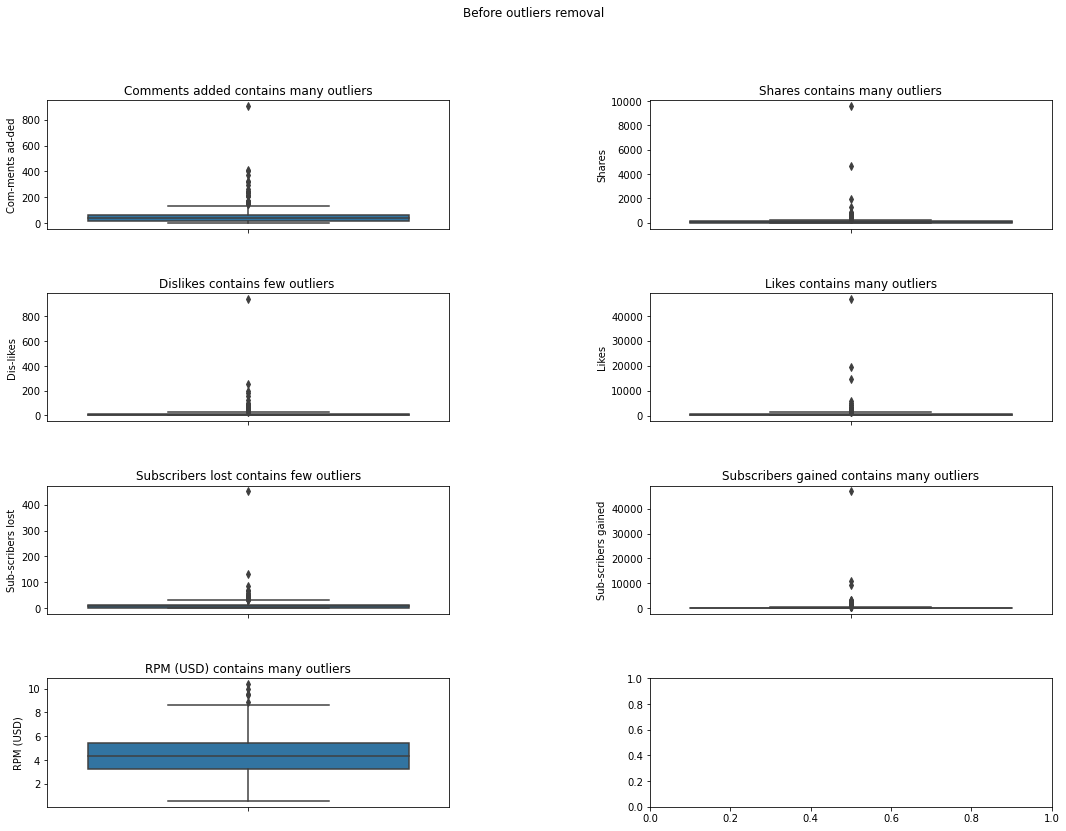

In [23]:
fig,ax=plt.subplots(4,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("Before outliers removal")
ax=ax.flatten()
sns.boxplot(y=data['Com­ments ad­ded'],ax=ax[0])
sns.boxplot(y=data['Shares'],ax=ax[1])
sns.boxplot(y=data['Dis­likes'],ax=ax[2])
sns.boxplot(y=data['Likes'],ax=ax[3])
sns.boxplot(y=data['Sub­scribers lost'],ax=ax[4])
sns.boxplot(y=data['Sub­scribers gained'],ax=ax[5])
sns.boxplot(y=data['RPM (USD)'],ax=ax[6])

ax[0].set_title("Comments added contains many outliers")
ax[1].set_title("Shares contains many outliers")
ax[2].set_title("Dislikes contains few outliers ")
ax[3].set_title("Likes contains many outliers")
ax[4].set_title("Subscribers lost contains few outliers")
ax[5].set_title("Subscribers gained contains many outliers")
ax[6].set_title("RPM (USD) contains many outliers")

Text(0.5, 1.0, 'Impressions click-through rate(%) contains many outliers')

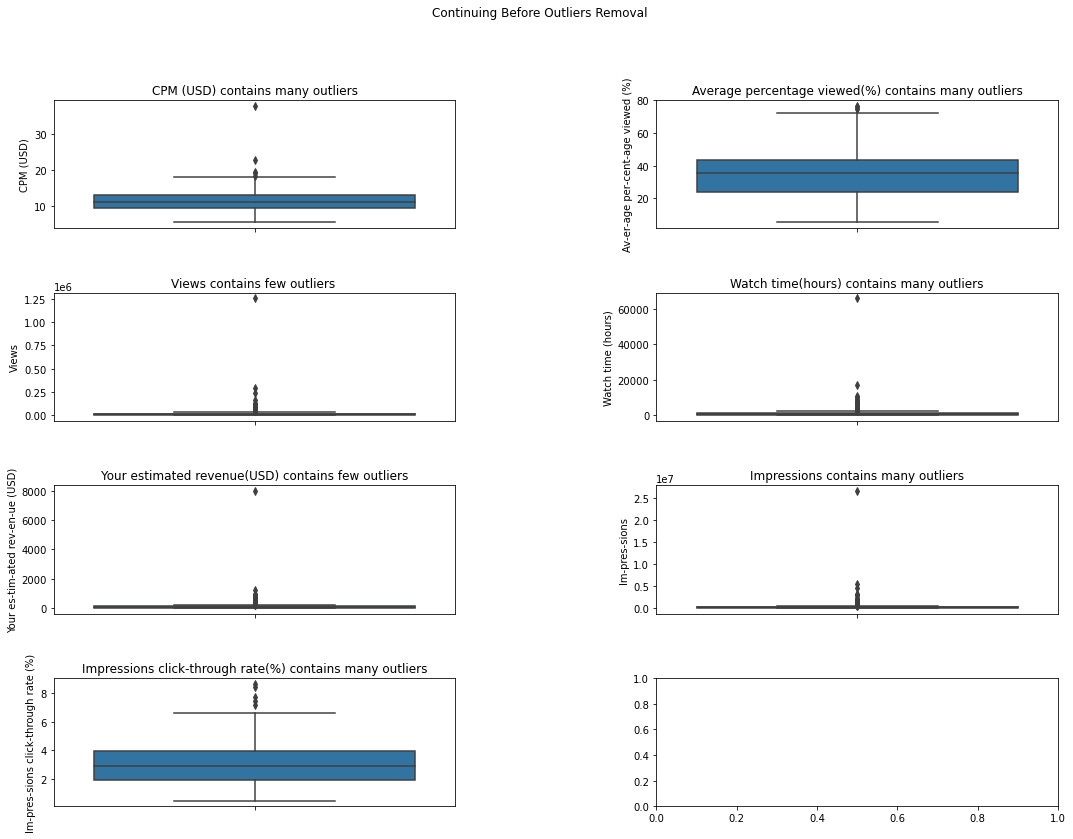

In [24]:
fig,ax=plt.subplots(4,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("Continuing Before Outliers Removal")
ax=ax.flatten()

sns.boxplot(y=data['CPM (USD)'],ax=ax[0])
sns.boxplot(y=data['Av­er­age per­cent­age viewed (%)'],ax=ax[1])
sns.boxplot(y=data['Views'],ax=ax[2])
sns.boxplot(y=data['Watch time (hours)'],ax=ax[3])
sns.boxplot(y=data['Your es­tim­ated rev­en­ue (USD)'],ax=ax[4])
sns.boxplot(y=data['Im­pres­sions'],ax=ax[5])
sns.boxplot(y=data['Im­pres­sions click-through rate (%)'],ax=ax[6])


ax[0].set_title("CPM (USD) contains many outliers")
ax[1].set_title("Average percentage viewed(%) contains many outliers")
ax[2].set_title("Views contains few outliers ")
ax[3].set_title("Watch time(hours) contains many outliers")
ax[4].set_title("Your estimated revenue(USD) contains few outliers")
ax[5].set_title("Impressions contains many outliers")
ax[6].set_title("Impressions click-through rate(%) contains many outliers")

With the help of a boxplot, we can find out outliers in Dataset. as you can that this dataset is that this contains many outliers so we  have to remove  this outliers.*The dotted line is outliers*.

### Z_score technique to eliminate outliers

Choice Explanation: We chose hist-plot with kernel density as a True graph for Open, High, Low, Close and Adj Close columns so that we can clearly understand that among them, which one has the normal distribution

From the graph, we can see that the Volume distribution is almost the right fit for the normal distribution, or we can say it is forming the correct bell curve. All of them are skewed towards the right.Hence, we are gonna take Volume for our further analysis.

In [25]:
print("Mean value of Your estimated revenue (USD)",data['Your es­tim­ated rev­en­ue (USD)'].mean())
print("Standard deviation of Your estimated revenue (USD)",data['Your es­tim­ated rev­en­ue (USD)'].std())
print("Minimum value of Your estimated revenue (USD)",data['Your es­tim­ated rev­en­ue (USD)'].min())
print("Maximum value of Your estimated revenue (USD)",data['Your es­tim­ated rev­en­ue (USD)'].max())

Mean value of Your estimated revenue (USD) 131.52819004524886
Standard deviation of Your estimated revenue (USD) 556.8783643572119
Minimum value of Your estimated revenue (USD) 0.274
Maximum value of Your estimated revenue (USD) 7959.533


Comment: The Your estimated revenue statistical measures shown here can be used to contrast the original values (from the original data) with the future values when the data will be devoid of outliers. Additionally, the analysis will be clear.

#### Identifying the outliers

       1. The very first step will be setting the upper and lower limit. This range stimulates that every data point will be regarded as an outlier out of this range. Let’s see the formulae for both upper and lower limits.
            -Upper: Mean + 3 * standard deviation.
            -Lower: MEan – 3 * standard deviation.

In [26]:
print("Upper limit",data['Your es­tim­ated rev­en­ue (USD)'].mean() + 3*data['Your es­tim­ated rev­en­ue (USD)'].std())
print("Lower limit",data['Your es­tim­ated rev­en­ue (USD)'].mean() - 3*data['Your es­tim­ated rev­en­ue (USD)'].std())

Upper limit 1802.1632831168847
Lower limit -1539.1069030263868


Comment: In the output, we see that the highest value is 1802.1632831168847 while the lowest value is -1539.1069030263868. Hence any value out of this range is the bad data point, will use the similar bounds to clean other features

#### Using z score, identify the DataFrames that contain outliers, and then remove them.

In [27]:
cam = data['Com­ments ad­ded'].mean() + 3*data['Com­ments ad­ded'].std()
cas = data['Com­ments ad­ded'].mean() - 3*data['Com­ments ad­ded'].std()

sm = data['Shares'].mean() + 3*data['Shares'].std()
ss = data['Shares'].mean() - 3*data['Shares'].std()

dim = data['Dis­likes'].mean() + 3*data['Dis­likes'].std()
dis = data['Dis­likes'].mean() - 3*data['Dis­likes'].std()

lm = data['Likes'].mean() + 3*data['Likes'].std()
ls = data['Likes'].mean() - 3*data['Likes'].std()

slm = data['Sub­scribers lost'].mean() + 3*data['Sub­scribers lost'].std()
sls = data['Sub­scribers lost'].mean() - 3*data['Sub­scribers lost'].std()

sgm = data['Sub­scribers gained'].mean() + 3*data['Sub­scribers gained'].std()
sgs = data['Sub­scribers gained'].mean() - 3*data['Sub­scribers gained'].std()

rpm = data['RPM (USD)'].mean() + 3*data['RPM (USD)'].std()
rps = data['RPM (USD)'].mean() - 3*data['RPM (USD)'].std()

cum = data['CPM (USD)'].mean() + 3*data['CPM (USD)'].std()
cus = data['CPM (USD)'].mean() - 3*data['CPM (USD)'].std()

apm = data['Av­er­age per­cent­age viewed (%)'].mean() + 3*data['Av­er­age per­cent­age viewed (%)'].std()
aps = data['Av­er­age per­cent­age viewed (%)'].mean() - 3*data['Av­er­age per­cent­age viewed (%)'].std()

vm = data['Views'].mean() + 3*data['Views'].std()
vs = data['Views'].mean() - 3*data['Views'].std()

wtm = data['Watch time (hours)'].mean() + 3*data['Watch time (hours)'].std()
wts = data['Watch time (hours)'].mean() - 3*data['Watch time (hours)'].std()

yem = data['Your es­tim­ated rev­en­ue (USD)'].mean() + 3*data['Your es­tim­ated rev­en­ue (USD)'].std()
yes = data['Your es­tim­ated rev­en­ue (USD)'].mean() - 3*data['Your es­tim­ated rev­en­ue (USD)'].std()

imm = data['Im­pres­sions'].mean() + 3*data['Im­pres­sions'].std()
iss = data['Im­pres­sions'].mean() - 3*data['Im­pres­sions'].std()

icm = data['Im­pres­sions click-through rate (%)'].mean() + 3*data['Im­pres­sions click-through rate (%)'].std()
ics = data['Im­pres­sions click-through rate (%)'].mean() - 3*data['Im­pres­sions click-through rate (%)'].std()

In [28]:
df1=data[~(data["Com­ments ad­ded"]>cam)|(data["Com­ments ad­ded"]<cas)]
df2=df1[~(df1["Shares"]>sm)|(df1["Shares"]<ss)]
df3=df2[~(df2["Dis­likes"]>dim)|(df2["Dis­likes"]<dis)]
df4=df3[~(df3["Likes"]>lm)|(df3["Likes"]<ls)]
df5=df4[~(df4["Sub­scribers lost"]>slm)|(df4["Sub­scribers lost"]<sls)]
df6=df5[~(df5["Sub­scribers gained"]>sgm)|(df5["Sub­scribers gained"]<sgs)]
df7=df6[~(df6["RPM (USD)"]>rpm)|(df6["RPM (USD)"]<rps)]
df8=df7[~(df7["CPM (USD)"]>cum)|(df7["CPM (USD)"]<cus)]
df9=df8[~(df8["Av­er­age per­cent­age viewed (%)"]>apm)|(df8["Av­er­age per­cent­age viewed (%)"]<aps)]
df10=df9[~(df9["Views"]>vm)|(df9["Views"]<vs)]
df11=df10[~(df10["Watch time (hours)"]>wtm)|(df10["Watch time (hours)"]<wts)]
df12=df11[~(df11["Your es­tim­ated rev­en­ue (USD)"]>yem)|(df11["Your es­tim­ated rev­en­ue (USD)"]<yes)]
df13=df12[~(df12["Im­pres­sions"]>imm)|(df12["Im­pres­sions"]<iss)]
df14=df13[~(df13["Im­pres­sions click-through rate (%)"]>icm)|(df13["Im­pres­sions click-through rate (%)"]<ics)]
data_clean=df14.copy()
data_clean

Video                                        Video title  \
5    Xgg7dIKys9E  Interview with the Director of AI Research @ N...   
6    -3d1NctSv0c    Ken Jee Q & A Live Stream (50,000 Sub Special!)   
8    4qZINLzwYyk  The State of Data Science with Krish Naik & Th...   
9    742LQ38OioU  Data Science Productivity, Motivation, and Org...   
10   GmW4F6MHqqs  Data Science Project from Scratch - Part 2 (Da...   
..           ...                                                ...   
217  qUK5Vk4NvBw  #66DaysOfData Round 3 Live Event! (feat. @Stat...   
219  FBgs-BSTIJE                    Demystifying Data Science Roles   
220  Yr5T3T4tq-g  Most Data Science Hopefuls Overlook This Impor...   
221  j-Z-je6K4Yg                   IT'S NOT TOO LATE TO LEARN CODE!   
222  5jntoZX-Tc8  NASA Physicist Turned Data Scientist (Tim Bowl...   

    Video pub­lish time  Com­ments ad­ded  Shares  Dis­likes  Likes  \
5           Aug 5, 2020               329     118         15    590   
6          Jun 20, 2020               317       8          2    137   
8           Jun 5, 2020               267     544         61    633   
9           Jul 1, 2020               246      17          5    191   
10          Apr 6, 2020               241     341         19   2378   
..                  ...               ...     ...        ...    ...   
217        Oct 12, 2021                 4      16          0    133   
219        Nov 30, 2018                 3       5          1     48   
220        May 25, 2019                 3       0          0     44   
221        Dec 18, 2018                 3       1          0     35   
222         May 5, 2019                 2       5          0     38   

     Sub­scribers lost  Sub­scribers gained  RPM (USD)  CPM (USD)  \
5                   11                  161      2.973      7.425   
6                   16                   11      2.286      5.786   
8                   38                  335      6.722      9.554   
9                   13                   26      2.461      5.439   
10                   5                  916      5.789     12.422   
..                 ...                  ...        ...        ...   
217                 12                   22      3.078      6.219   
219                  1                    8      5.218     16.232   
220                  0                    5      3.374     15.596   
221                  0                    7      3.784     12.590   
222                  0                    3      2.651     12.206   

     Av­er­age per­cent­age viewed (%) Av­er­age view dur­a­tion  Views  \
5                                 9.55                   0:04:37  13429   
6                                10.40                   0:05:55   2326   
8                                 9.52                   0:03:36  20089   
9                                 8.49                   0:04:56   3711   
10                               24.28                   0:06:47  71147   
..                                 ...                       ...    ...   
217                               7.83                   0:04:52   2038   
219                              55.55                   0:03:28    978   
220                              58.62                   0:02:06    548   
221                              60.52                   0:01:52    721   
222                              16.93                   0:03:09   1094   

     Watch time (hours)  Sub­scribers  Your es­tim­ated rev­en­ue (USD)  \
5             1034.3945           150                            39.920   
6              229.4255            -5                             5.318   
8             1205.8213           297                           135.037   
9              305.6106            13                             9.132   
10            8050.7031           911                           411.331   
..                  ...           ...                               ...   
217            165.5004            10             

#### Dataset after the removal of outliers using the Z_score method

Text(0.5, 1.0, 'RPM (USD) contains many outliers')

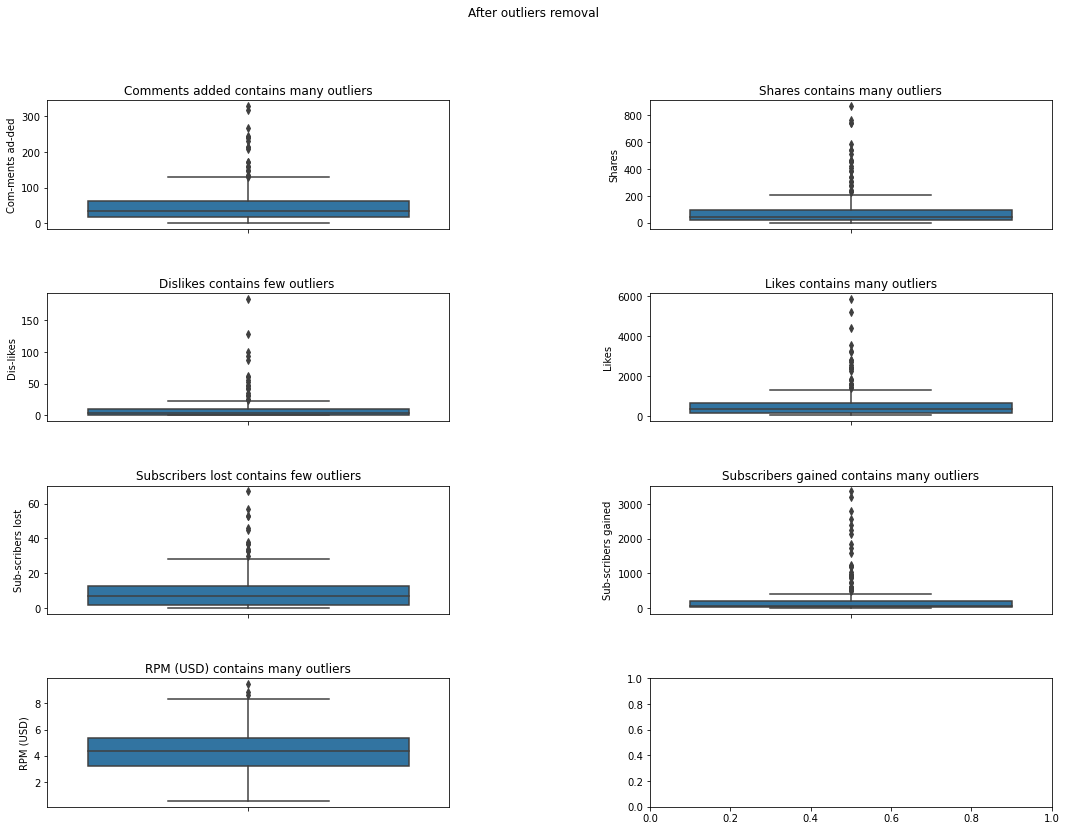

In [29]:
fig,ax=plt.subplots(4,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("After outliers removal")
ax=ax.flatten()
sns.boxplot(y=data_clean['Com­ments ad­ded'],ax=ax[0])
sns.boxplot(y=data_clean['Shares'],ax=ax[1])
sns.boxplot(y=data_clean['Dis­likes'],ax=ax[2])
sns.boxplot(y=data_clean['Likes'],ax=ax[3])
sns.boxplot(y=data_clean['Sub­scribers lost'],ax=ax[4])
sns.boxplot(y=data_clean['Sub­scribers gained'],ax=ax[5])
sns.boxplot(y=data_clean['RPM (USD)'],ax=ax[6])

ax[0].set_title("Comments added contains many outliers")
ax[1].set_title("Shares contains many outliers")
ax[2].set_title("Dislikes contains few outliers ")
ax[3].set_title("Likes contains many outliers")
ax[4].set_title("Subscribers lost contains few outliers")
ax[5].set_title("Subscribers gained contains many outliers")
ax[6].set_title("RPM (USD) contains many outliers")

Text(0.5, 1.0, 'Impressions click-through rate(%) contains many outliers')

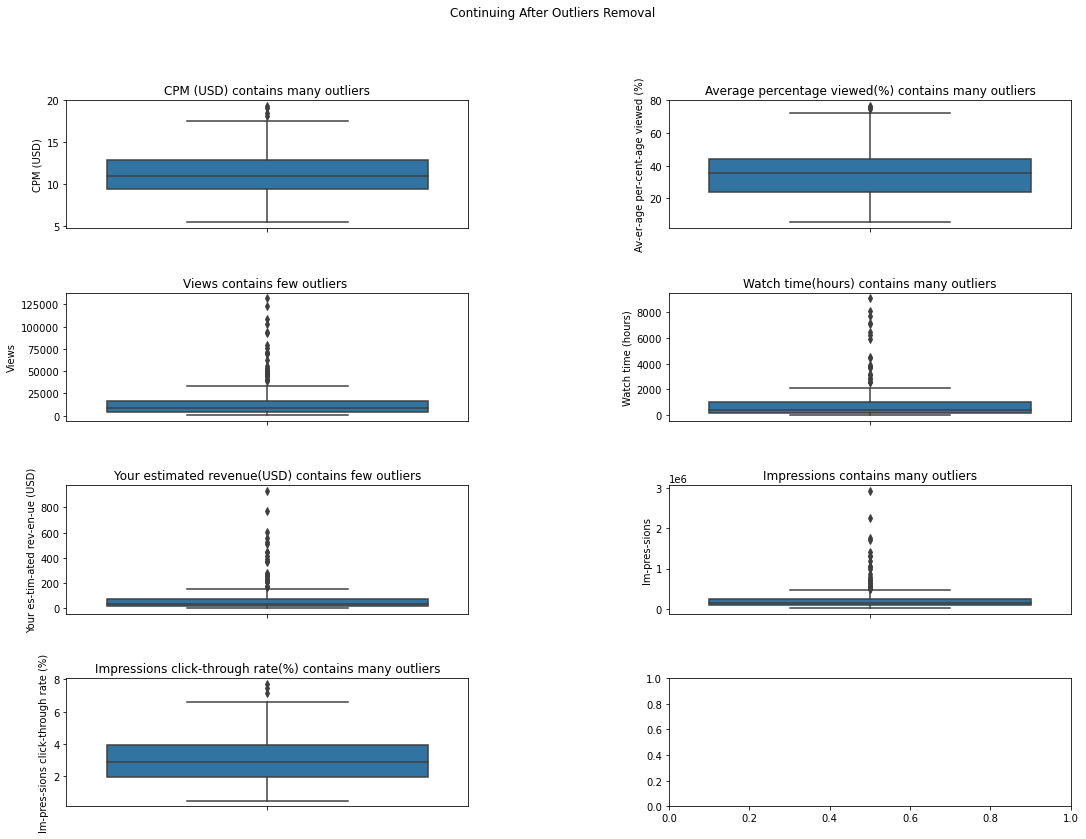

In [30]:
fig,ax=plt.subplots(4,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("Continuing After Outliers Removal")
ax=ax.flatten()

sns.boxplot(y=data_clean['CPM (USD)'],ax=ax[0])
sns.boxplot(y=data_clean['Av­er­age per­cent­age viewed (%)'],ax=ax[1])
sns.boxplot(y=data_clean['Views'],ax=ax[2])
sns.boxplot(y=data_clean['Watch time (hours)'],ax=ax[3])
sns.boxplot(y=data_clean['Your es­tim­ated rev­en­ue (USD)'],ax=ax[4])
sns.boxplot(y=data_clean['Im­pres­sions'],ax=ax[5])
sns.boxplot(y=data_clean['Im­pres­sions click-through rate (%)'],ax=ax[6])


ax[0].set_title("CPM (USD) contains many outliers")
ax[1].set_title("Average percentage viewed(%) contains many outliers")
ax[2].set_title("Views contains few outliers ")
ax[3].set_title("Watch time(hours) contains many outliers")
ax[4].set_title("Your estimated revenue(USD) contains few outliers")
ax[5].set_title("Impressions contains many outliers")
ax[6].set_title("Impressions click-through rate(%) contains many outliers")

### Normal distribution testing

#### Gaussian Normal Distribution Testing:
    It is believed that throughout any measurement, values will follow a normal distribution with an equal number of measurements above and below the mean value. This is known as the Gaussian distribution, also known as the normal distribution. The Bell curve depicts the distribution normally. If the features column is not normally distributed, then we will normalize it using several techniques, such as log transformation, reciprocal transformation, square root transformation,etc.

In [31]:
s11 = data_clean['Com­ments ad­ded'].skew()
s1 = data_clean['Shares'].skew()
s2 = data_clean['Dis­likes'].skew()
s3 = data_clean['Likes'].skew()
s4 = data_clean['Sub­scribers lost'].skew()
s5 = data_clean['Sub­scribers gained'].skew()
s6 = data_clean['RPM (USD)'].skew()
s7 = data_clean['CPM (USD)'].skew()
s8 = data_clean['Av­er­age per­cent­age viewed (%)'].skew()
s9 = data_clean['Views'].skew()
s10 = data_clean['Watch time (hours)'].skew()
s11 = data_clean['Your es­tim­ated rev­en­ue (USD)'].skew()
s12 = data_clean['Im­pres­sions'].skew()
s13 = data_clean['Im­pres­sions click-through rate (%)'].skew()

C:\Users\phiez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phiez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phiez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

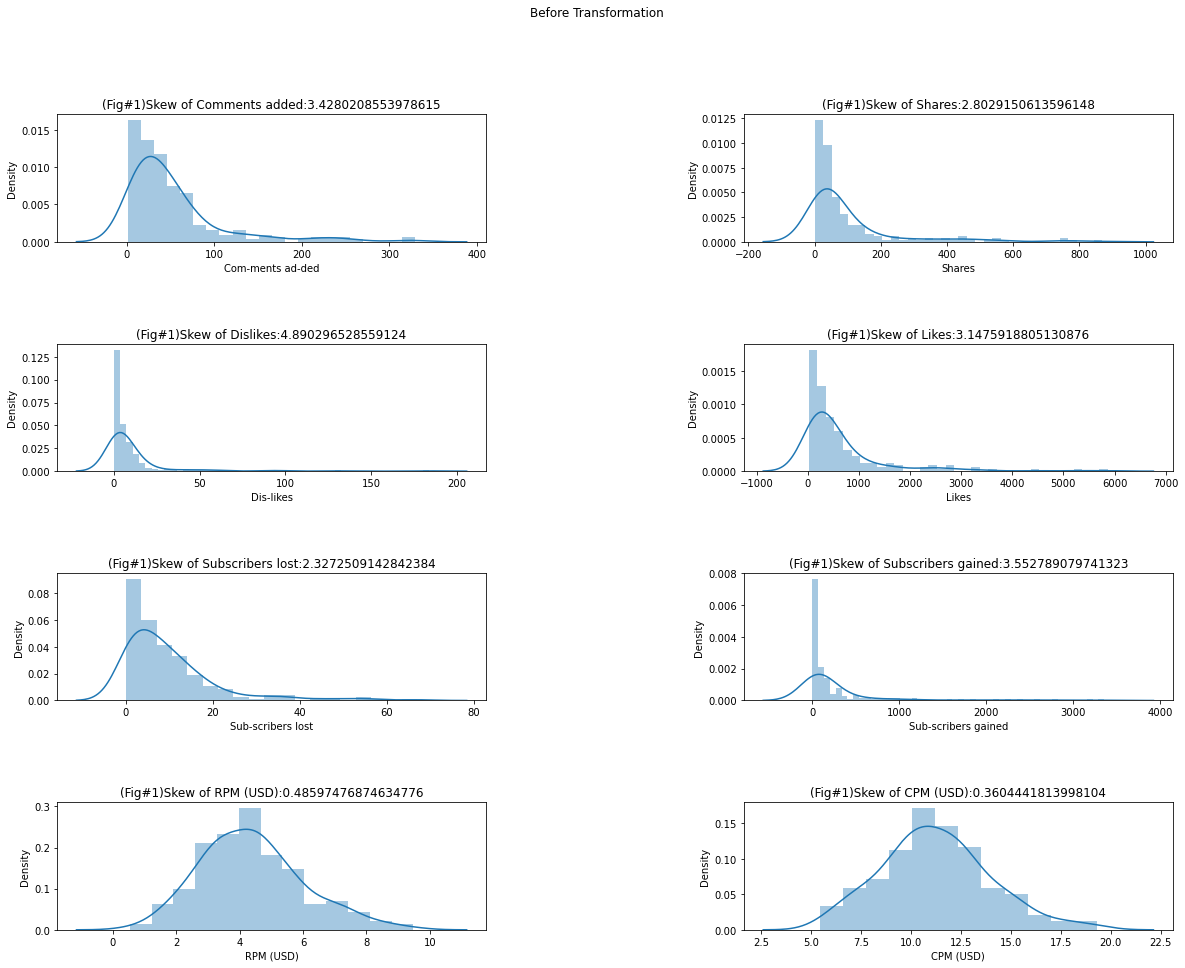

In [32]:
fig,ax=plt.subplots(4,2,figsize=(20,15))
plt.subplots_adjust(hspace=0.8,wspace=0.6)
fig.suptitle("Before Transformation")
ax=ax.flatten()

sns.distplot(data_clean['Com­ments ad­ded'],ax=ax[0])
sns.distplot(data_clean['Shares'],ax=ax[1])
sns.distplot(data_clean['Dis­likes'],ax=ax[2])
sns.distplot(data_clean['Likes'],ax=ax[3])
sns.distplot(data_clean['Sub­scribers lost'],ax=ax[4])
sns.distplot(data_clean['Sub­scribers gained'],ax=ax[5])
sns.distplot(data_clean['RPM (USD)'],ax=ax[6])
sns.distplot(data_clean['CPM (USD)'],ax=ax[7])


ax[0].set_title("(Fig#1)Skew of Comments added:"+str(s11))
ax[1].set_title("(Fig#1)Skew of Shares:"+str(s1))
ax[2].set_title("(Fig#1)Skew of Dislikes:"+str(s2))
ax[3].set_title("(Fig#1)Skew of Likes:"+str(s3))
ax[4].set_title("(Fig#1)Skew of Subscribers lost:"+str(s4))
ax[5].set_title("(Fig#1)Skew of Subscribers gained:"+str(s5))
ax[6].set_title("(Fig#1)Skew of RPM (USD):"+str(s6))
ax[7].set_title("(Fig#1)Skew of CPM (USD):"+str(s7))
warnings.filterwarnings("ignore")

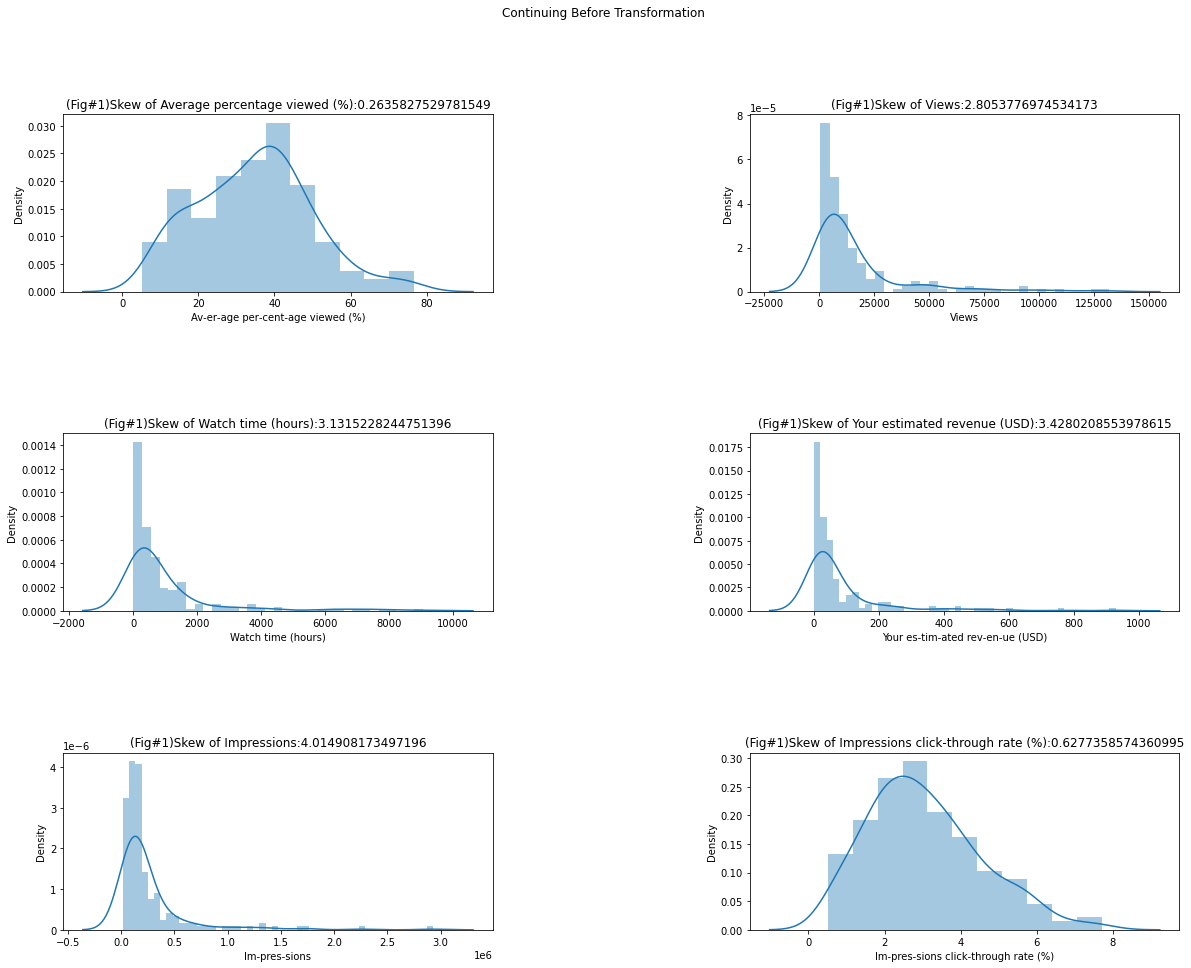

In [33]:
fig,ax=plt.subplots(3,2,figsize=(20,15))
plt.subplots_adjust(hspace=0.8,wspace=0.6)
fig.suptitle("Continuing Before Transformation")
ax=ax.flatten()

sns.distplot(data_clean['Av­er­age per­cent­age viewed (%)'],ax=ax[0])
sns.distplot(data_clean['Views'],ax=ax[1])
sns.distplot(data_clean['Watch time (hours)'],ax=ax[2])
sns.distplot(data_clean['Your es­tim­ated rev­en­ue (USD)'],ax=ax[3])
sns.distplot(data_clean['Im­pres­sions'],ax=ax[4])
sns.distplot(data_clean['Im­pres­sions click-through rate (%)'],ax=ax[5])


ax[0].set_title("(Fig#1)Skew of Average percentage viewed (%):"+str(s8))
ax[1].set_title("(Fig#1)Skew of Views:"+str(s9))
ax[2].set_title("(Fig#1)Skew of Watch time (hours):"+str(s10))
ax[3].set_title("(Fig#1)Skew of Your estimated revenue (USD):"+str(s11))
ax[4].set_title("(Fig#1)Skew of Impressions:"+str(s12))
ax[5].set_title("(Fig#1)Skew of Impressions click-through rate (%):"+str(s13))
warnings.filterwarnings("ignore")

**Regarding normal distribution As you can see, there are many features that skew very high and very low. Since many features are not normally distributed, the skew fore curve should be equal to zero, so we will use the Different Transformations approach.**

In [34]:
boxcox1=PowerTransformer('yeo-johnson').fit_transform(data_clean[['Com­ments ad­ded']])
data_clean["Com­ments ad­ded"]=boxcox1
boxcox2=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Shares"]])
data_clean["Shares"]=boxcox2
boxcox3=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Dis­likes"]])
data_clean["Dis­likes"]=boxcox3
boxcox4=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Likes"]])
data_clean["Likes"]=boxcox4
boxcox5=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Sub­scribers lost"]])
data_clean["Sub­scribers lost"]=boxcox5
boxcox6=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Sub­scribers gained"]])
data_clean["Sub­scribers gained"]=boxcox6
boxcox7=PowerTransformer('yeo-johnson').fit_transform(data_clean[["RPM (USD)"]])
data_clean["RPM (USD)"]=boxcox7

boxcox8=PowerTransformer('yeo-johnson').fit_transform(data_clean[["CPM (USD)"]])
data_clean["CPM (USD)"]=boxcox8
boxcox9=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Av­er­age per­cent­age viewed (%)"]])
data_clean["Av­er­age per­cent­age viewed (%)"]=boxcox9
boxcox10=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Views"]])
data_clean["Views"]=boxcox10
boxcox11=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Watch time (hours)"]])
data_clean["Watch time (hours)"]=boxcox11
boxcox12=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Your es­tim­ated rev­en­ue (USD)"]])
data_clean["Your es­tim­ated rev­en­ue (USD)"]=boxcox12
boxcox13=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Im­pres­sions"]])
data_clean["Im­pres­sions"]=boxcox13
boxcox14=PowerTransformer('yeo-johnson').fit_transform(data_clean[["Im­pres­sions click-through rate (%)"]])
data_clean["Im­pres­sions click-through rate (%)"]=boxcox14



On the above cell, we used power_transform function, it is used to apply a family of monotonic, parametric modifications to data to make it more gaussian-like. This is helpful when modeling heteroscedasticity (non-constant variance) problems or other circumstances when normalcy is preferred.

In [35]:
a11 = data_clean['Com­ments ad­ded'].skew()
a1 = data_clean['Shares'].skew()
a2 = data_clean['Dis­likes'].skew()
a3 = data_clean['Likes'].skew()
a4 = data_clean['Sub­scribers lost'].skew()
a5 = data_clean['Sub­scribers gained'].skew()
a6 = data_clean['RPM (USD)'].skew()
a7 = data_clean['CPM (USD)'].skew()
a8 = data_clean['Av­er­age per­cent­age viewed (%)'].skew()
a9 = data_clean['Views'].skew()
a10 = data_clean['Watch time (hours)'].skew()
a11 = data_clean['Your es­tim­ated rev­en­ue (USD)'].skew()
a12 = data_clean['Im­pres­sions'].skew()
a13 = data_clean['Im­pres­sions click-through rate (%)'].skew()

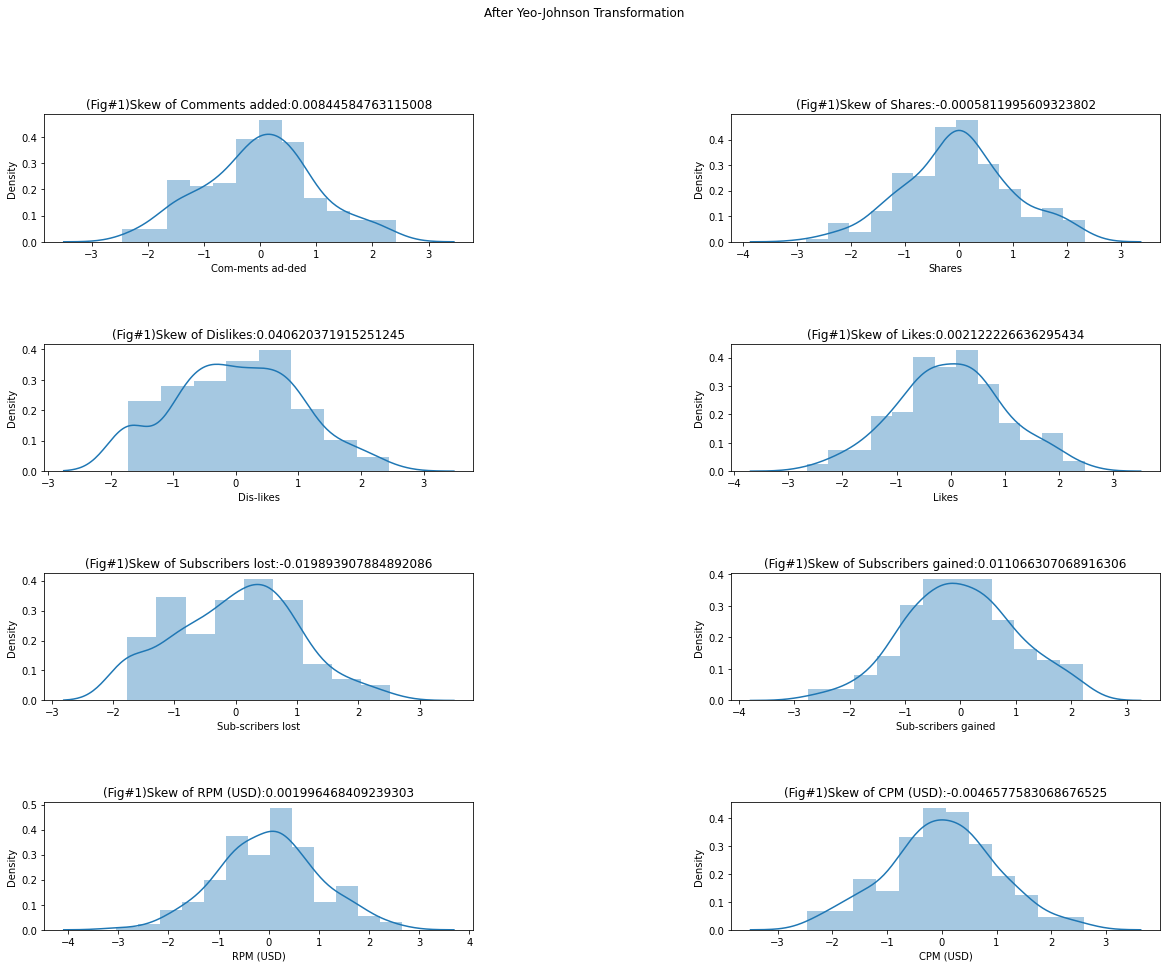

In [36]:
fig,ax=plt.subplots(4,2,figsize=(20,15))
plt.subplots_adjust(hspace=0.8,wspace=0.6)
fig.suptitle("After Yeo-Johnson Transformation")
ax=ax.flatten()

sns.distplot(data_clean['Com­ments ad­ded'],ax=ax[0])
sns.distplot(data_clean['Shares'],ax=ax[1])
sns.distplot(data_clean['Dis­likes'],ax=ax[2])
sns.distplot(data_clean['Likes'],ax=ax[3])
sns.distplot(data_clean['Sub­scribers lost'],ax=ax[4])
sns.distplot(data_clean['Sub­scribers gained'],ax=ax[5])
sns.distplot(data_clean['RPM (USD)'],ax=ax[6])
sns.distplot(data_clean['CPM (USD)'],ax=ax[7])


ax[0].set_title("(Fig#1)Skew of Comments added:"+str(a11))
ax[1].set_title("(Fig#1)Skew of Shares:"+str(a1))
ax[2].set_title("(Fig#1)Skew of Dislikes:"+str(a2))
ax[3].set_title("(Fig#1)Skew of Likes:"+str(a3))
ax[4].set_title("(Fig#1)Skew of Subscribers lost:"+str(a4))
ax[5].set_title("(Fig#1)Skew of Subscribers gained:"+str(a5))
ax[6].set_title("(Fig#1)Skew of RPM (USD):"+str(a6))
ax[7].set_title("(Fig#1)Skew of CPM (USD):"+str(a7))
warnings.filterwarnings("ignore")

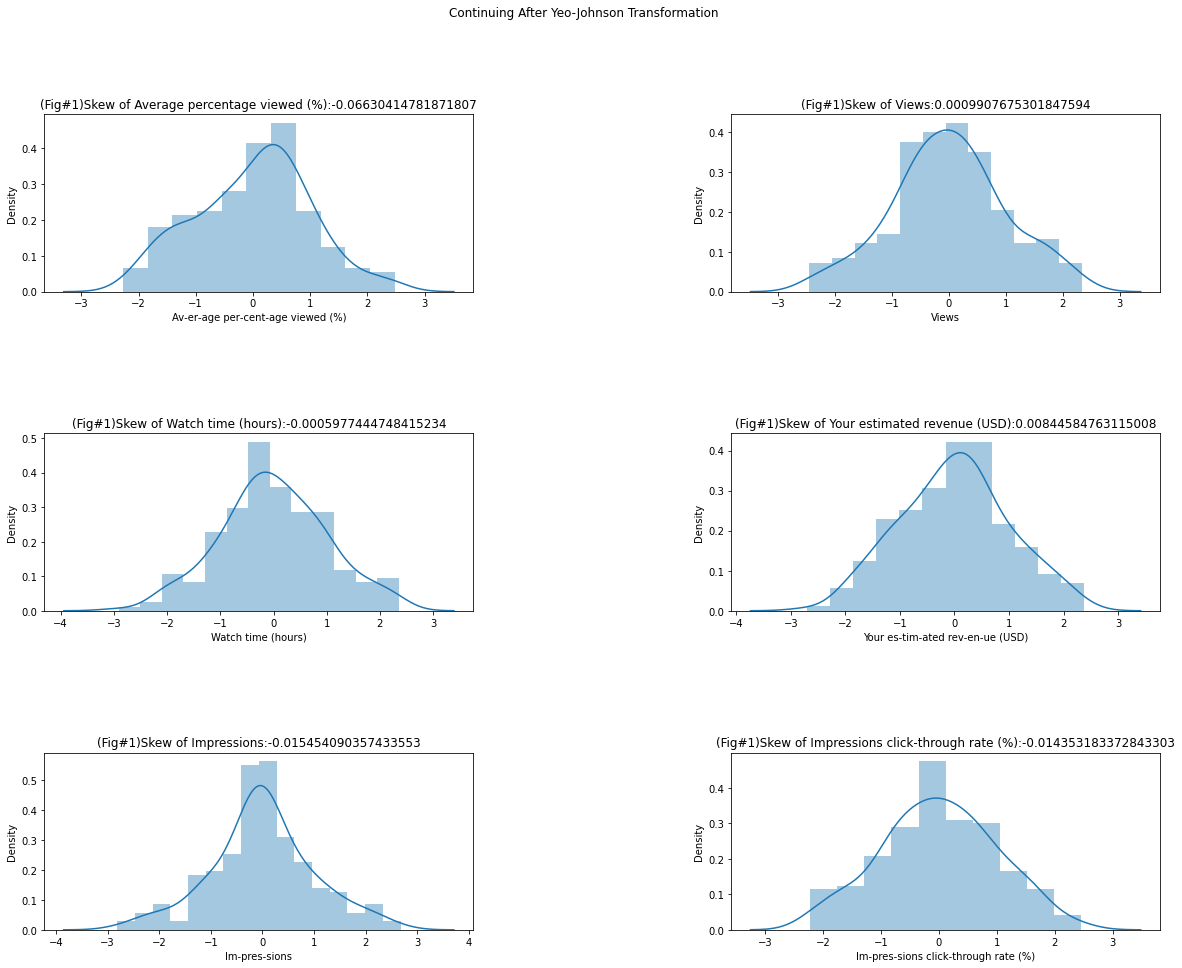

In [37]:
fig,ax=plt.subplots(3,2,figsize=(20,15))
plt.subplots_adjust(hspace=0.8,wspace=0.6)
fig.suptitle("Continuing After Yeo-Johnson Transformation")
ax=ax.flatten()

sns.distplot(data_clean['Av­er­age per­cent­age viewed (%)'],ax=ax[0])
sns.distplot(data_clean['Views'],ax=ax[1])
sns.distplot(data_clean['Watch time (hours)'],ax=ax[2])
sns.distplot(data_clean['Your es­tim­ated rev­en­ue (USD)'],ax=ax[3])
sns.distplot(data_clean['Im­pres­sions'],ax=ax[4])
sns.distplot(data_clean['Im­pres­sions click-through rate (%)'],ax=ax[5])


ax[0].set_title("(Fig#1)Skew of Average percentage viewed (%):"+str(a8))
ax[1].set_title("(Fig#1)Skew of Views:"+str(a9))
ax[2].set_title("(Fig#1)Skew of Watch time (hours):"+str(a10))
ax[3].set_title("(Fig#1)Skew of Your estimated revenue (USD):"+str(a11))
ax[4].set_title("(Fig#1)Skew of Impressions:"+str(a12))
ax[5].set_title("(Fig#1)Skew of Impressions click-through rate (%):"+str(a13))
warnings.filterwarnings("ignore")


## Removing the non-float columns

In [38]:
data_clean.head()

Video                                        Video title  \
5   Xgg7dIKys9E  Interview with the Director of AI Research @ N...   
6   -3d1NctSv0c    Ken Jee Q & A Live Stream (50,000 Sub Special!)   
8   4qZINLzwYyk  The State of Data Science with Krish Naik & Th...   
9   742LQ38OioU  Data Science Productivity, Motivation, and Org...   
10  GmW4F6MHqqs  Data Science Project from Scratch - Part 2 (Da...   

   Video pub­lish time  Com­ments ad­ded    Shares  Dis­likes     Likes  \
5          Aug 5, 2020          2.417304  0.737024   1.039141  0.516237   
6         Jun 20, 2020          2.375894 -1.234252  -0.433377 -0.791629   
8          Jun 5, 2020          2.185292  1.954093   1.907650  0.578042   
9          Jul 1, 2020          2.094741 -0.716330   0.238917 -0.489976   
10         Apr 6, 2020          2.072084  1.576917   1.199537  1.719203   

    Sub­scribers lost  Sub­scribers gained  RPM (USD)  CPM (USD)  \
5            0.517071             0.498250  -0.854508  -1.490875   
6            0.890334            -1.304744  -1.375576  -2.281520   
8            1.839669             0.946599   1.376771  -0.585928   
9            0.680514            -0.706821  -1.237688  -2.462570   
10          -0.184757             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%) Av­er­age view dur­a­tion     Views  \
5                           -1.835757                   0:04:37  0.441055   
6                           -1.756964                   0:05:55 -1.063979   
8                           -1.838571                   0:03:36  0.780453   
9                           -1.936727                   0:04:56 -0.658567   
10                          -0.642243                   0:06:47  1.830935   

    Watch time (hours)  Sub­scribers  Your es­tim­ated rev­en­ue (USD)  \
5             0.695476           150                          0.180734   
6            -0.424760            -5                         -1.310440   
8             0.811052           297                          1.067723   
9            -0.213646            13                         -0.920040   
10            2.263957           911                          1.839960   

    Im­pres­sions  Im­pres­sions click-through rate (%)  
5        0.372424                              0.350314  
6       -0.230748                             -1.637428  
8        1.996914                             -1.408026  
9       -0.152396                             -1.263878  
10       1.465755                              1.973257

In [39]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5 to 222
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 207 non-null    object 
 1   Video title                           207 non-null    object 
 2   Video pub­lish time                   207 non-null    object 
 3   Com­ments ad­ded                      207 non-null    float64
 4   Shares                                207 non-null    float64
 5   Dis­likes                             207 non-null    float64
 6   Likes                                 207 non-null    float64
 7   Sub­scribers lost                     207 non-null    float64
 8   Sub­scribers gained                   207 non-null    float64
 9   RPM (USD)                             207 non-null    float64
 10  CPM (USD)                             207 non-null    float64
 11  Av­er­age per­cent­

In [40]:
data_clean.drop('Video', inplace=True, axis=1)

In [41]:
data_clean.drop('Video title', inplace=True, axis=1)

In [42]:
data_clean.drop('Video pub­lish time', inplace=True, axis=1)

In [43]:
data_clean.drop('Av­er­age view dur­a­tion', inplace=True, axis=1)

In [44]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5 to 222
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Com­ments ad­ded                      207 non-null    float64
 1   Shares                                207 non-null    float64
 2   Dis­likes                             207 non-null    float64
 3   Likes                                 207 non-null    float64
 4   Sub­scribers lost                     207 non-null    float64
 5   Sub­scribers gained                   207 non-null    float64
 6   RPM (USD)                             207 non-null    float64
 7   CPM (USD)                             207 non-null    float64
 8   Av­er­age per­cent­age viewed (%)     207 non-null    float64
 9   Views                                 207 non-null    float64
 10  Watch time (hours)                    207 non-null    float64
 11  Sub­scribers       

In [45]:
data_clean.head()

Com­ments ad­ded    Shares  Dis­likes     Likes  Sub­scribers lost  \
5           2.417304  0.737024   1.039141  0.516237           0.517071   
6           2.375894 -1.234252  -0.433377 -0.791629           0.890334   
8           2.185292  1.954093   1.907650  0.578042           1.839669   
9           2.094741 -0.716330   0.238917 -0.489976           0.680514   
10          2.072084  1.576917   1.199537  1.719203          -0.184757   

    Sub­scribers gained  RPM (USD)  CPM (USD)  \
5              0.498250  -0.854508  -1.490875   
6             -1.304744  -1.375576  -2.281520   
8              0.946599   1.376771  -0.585928   
9             -0.706821  -1.237688  -2.462570   
10             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%)     Views  Watch time (hours)  \
5                           -1.835757  0.441055            0.695476   
6                           -1.756964 -1.063979           -0.424760   
8                           -1.838571  0.780453            0.811052   
9                           -1.936727 -0.658567           -0.213646   
10                          -0.642243  1.830935            2.263957   

    Sub­scribers  Your es­tim­ated rev­en­ue (USD)  Im­pres­sions  \
5            150                          0.180734       0.372424   
6             -5                         -1.310440      -0.230748   
8            297                          1.067723       1.996914   
9             13                         -0.920040      -0.152396   
10           911                          1.839960       1.465755   

    Im­pres­sions click-through rate (%)  
5                               0.350314  
6                              -1.637428  
8                              -1.408026  
9                              -1.263878  
10                              1.973257

## Correlation Testing:
Correlation test matrix is used to evaluate the association between two or more variables.
- The correlation matrix makes the absence or presence of a relationship between two variables clear. This makes it more relevant.
- The correlation matrix helps to predict the evolution of the relationship between the variables.
- The correlation matrix allows you to have a global view of the more or less strong relationship between several variables.
- It’s always easier to understand the data when it’s presented in a visual way

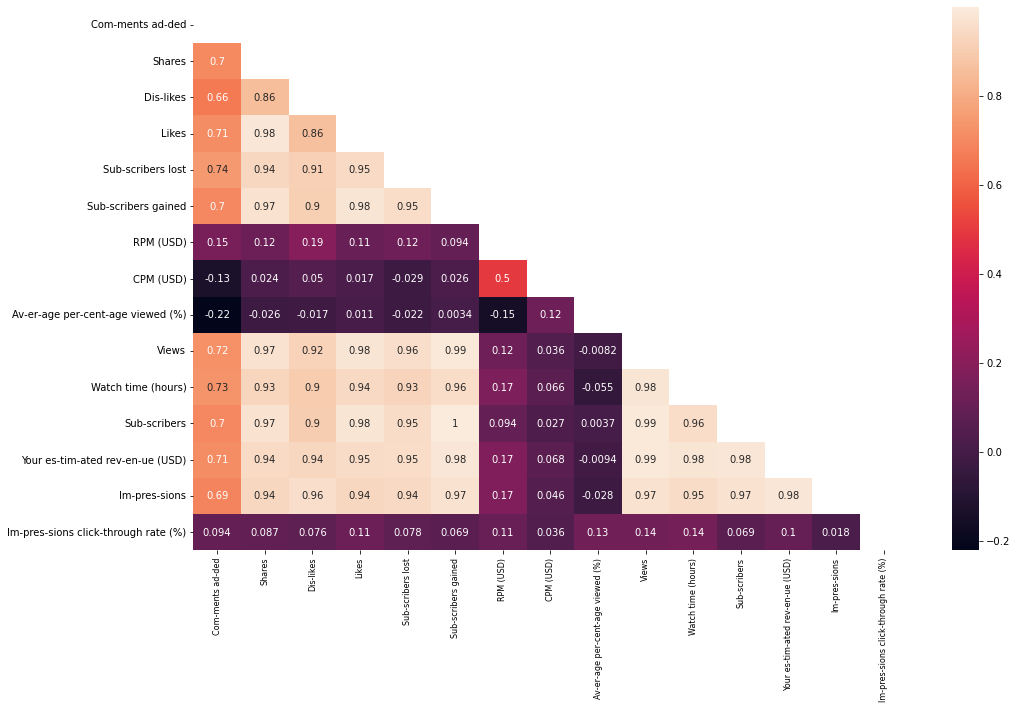

In [46]:
mask = np.zeros_like(data_clean.corr()) 
triangle_indeces=np.triu_indices_from(mask)
mask[triangle_indeces] =True
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

### Creating a Target Column through Feature Engineering
    Now we have to create a target column which will describe the weight of Your estimated revenue (USD) in 0 and 1 format ,0 means high weighted 'Your estimated revenue (USD)'  and 1 means low weighted 'Your estimated revenue (USD)'

In [47]:
data_clean['weight'] = [1 if x >= 0.725 else 0 for x in data_clean['Your es­tim­ated rev­en­ue (USD)']] # Target column

In [48]:
data_clean.head()

Com­ments ad­ded    Shares  Dis­likes     Likes  Sub­scribers lost  \
5           2.417304  0.737024   1.039141  0.516237           0.517071   
6           2.375894 -1.234252  -0.433377 -0.791629           0.890334   
8           2.185292  1.954093   1.907650  0.578042           1.839669   
9           2.094741 -0.716330   0.238917 -0.489976           0.680514   
10          2.072084  1.576917   1.199537  1.719203          -0.184757   

    Sub­scribers gained  RPM (USD)  CPM (USD)  \
5              0.498250  -0.854508  -1.490875   
6             -1.304744  -1.375576  -2.281520   
8              0.946599   1.376771  -0.585928   
9             -0.706821  -1.237688  -2.462570   
10             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%)     Views  Watch time (hours)  \
5                           -1.835757  0.441055            0.695476   
6                           -1.756964 -1.063979           -0.424760   
8                           -1.838571  0.780453            0.811052   
9                           -1.936727 -0.658567           -0.213646   
10                          -0.642243  1.830935            2.263957   

    Sub­scribers  Your es­tim­ated rev­en­ue (USD)  Im­pres­sions  \
5            150                          0.180734       0.372424   
6             -5                         -1.310440      -0.230748   
8            297                          1.067723       1.996914   
9             13                         -0.920040      -0.152396   
10           911                          1.839960       1.465755   

    Im­pres­sions click-through rate (%)  weight  
5                               0.350314       0  
6                              -1.637428       0  
8                              -1.408026       1  
9                              -1.263878       0  
10                              1.973257       1

    Since we already have the target column, we no longer need the quality column, thus we will remove it.

In [49]:
data_clean.drop('Your es­tim­ated rev­en­ue (USD)',axis=1,inplace=True)

### Checking the Correlation of Features columns with Target column

<AxesSubplot:title={'center':'Correlation of feature columns with weight column'}>

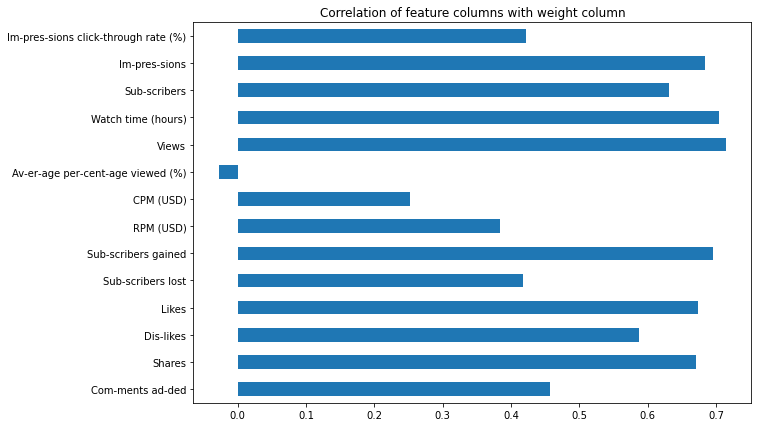

In [50]:
data_clean.drop("weight",axis=1).corrwith(data_clean["weight"]).plot(kind="barh", figsize=(10, 7)
                                                             ,title="Correlation of feature columns with weight column")

The above plot shows that views, watch time(hours) and Subscribers gained are highly correlated with the target column so these columns is higly effective on prediction

## Splitting a dataset to train, test, and validation sets

In [51]:
target=data_clean['weight']
independent=data_clean.drop('weight',axis=1)

In [52]:
# setting aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(independent, target,
    test_size=0.2, shuffle = True, random_state = 8)

# Using the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

### Perform Feature Scaling

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Checking if label encoding is required.
        Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [54]:
!pip install python-utils

In [55]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y_train))

binary


Since the type of the target variable is 'binary', then label encoding is not required

## Implementation of Feature Selection Techniques

     Finding the optimal set of features for building practical models of the phenomena being studied is the aim of feature selection in machine learning.

### 1. Forward Feature Selection
      With this iterative approach, we start with the variable that performs the best in relation to the target. Next, we choose a different variable that, when combined with the first one, provides the best performance. This method keeps going till the predetermined criterion is met.

In [56]:
print('There are {} initial features in our data'.format(len(data.columns)))

There are 19 initial features in our data


In [57]:
!pip install mlxtend

In [58]:
lr = LogisticRegression()

no_features = [3,5,7,10]
for i in range(len(no_features)):
    fs1 = sfs(lr, k_features=no_features[i], forward=True, verbose=1, scoring='accuracy', cv=5)
    startf = timer()
    fs1 = fs1.fit(X_train, y_train)
    endf = timer()
    t_timef = endf-startf
    trained_f = list(fs1.k_feature_names_)
    score = fs1.k_score_
    k_features = fs1.k_feature_idx_
    data.columns[1:][list(k_features)]
    X_train_sele = fs1.transform(X_train)
    X_test_sele = fs1.transform(X_test)
    print(f'Top {no_features[i]} Features in Forward Selection')
    print(f"Training duration: {t_timef}")
    print("Selected features:", trained_f)
    print(f'prediction score for these {no_features[i]} features:',score)
    print("---------------------------------------------------------------------------------------------------")
    warnings.filterwarnings("ignore")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
Features: 1/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
Features: 2/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
Features: 3/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Top 3 Features in Forward Selection
Training duration: 0.3947654999999983
Selected features: ['RPM (USD)', 'CPM (USD)', 'Views']
prediction score for these 3 features: 0.9836666666666666
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Top 5 Features in Forward Selection
Training duration: 0.6412814999999981
Selected features: ['RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views', 'Watch time (hours)']
prediction score for these 5 features: 0.9673333333333334
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

Top 7 Features in Forward Selection
Training duration: 0.8936987000000016
Selected features: ['Dis\xadlikes', 'Sub\xadscribers gained', 'RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views', 'Watch time (hours)']
prediction score for these 7 features: 0.9753333333333334
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

Top 10 Features in Forward Selection
Training duration: 1.2110579000000001
Selected features: ['Dis\xadlikes', 'Likes', 'Sub\xadscribers gained', 'RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views', 'Watch time (hours)', 'Sub\xadscribers', 'Im\xadpres\xadsions click-through rate (%)']
prediction score for these 10 features: 0.967
---------------------------------------------------------------------------------------------------


In [59]:
data_clean.head()

Com­ments ad­ded    Shares  Dis­likes     Likes  Sub­scribers lost  \
5           2.417304  0.737024   1.039141  0.516237           0.517071   
6           2.375894 -1.234252  -0.433377 -0.791629           0.890334   
8           2.185292  1.954093   1.907650  0.578042           1.839669   
9           2.094741 -0.716330   0.238917 -0.489976           0.680514   
10          2.072084  1.576917   1.199537  1.719203          -0.184757   

    Sub­scribers gained  RPM (USD)  CPM (USD)  \
5              0.498250  -0.854508  -1.490875   
6             -1.304744  -1.375576  -2.281520   
8              0.946599   1.376771  -0.585928   
9             -0.706821  -1.237688  -2.462570   
10             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%)     Views  Watch time (hours)  \
5                           -1.835757  0.441055            0.695476   
6                           -1.756964 -1.063979           -0.424760   
8                           -1.838571  0.780453            0.811052   
9                           -1.936727 -0.658567           -0.213646   
10                          -0.642243  1.830935            2.263957   

    Sub­scribers  Im­pres­sions  Im­pres­sions click-through rate (%)  weight  
5            150       0.372424                              0.350314       0  
6             -5      -0.230748                             -1.637428       0  
8            297       1.996914                             -1.408026       1  
9             13      -0.152396                             -1.263878       0  
10           911       1.465755                              1.973257       1

#### Feature Selection with Correlation and Sequential Forward Selection(Creation of sets of selected features and furthermore creating training, test and validation sets)

**1. Selecting Top 3 features**
    -According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'RPM (USD)', 'CPM (USD)' and 'Views' are highly correlated with each other, so we will use only them for the Top 3 features.

In [60]:
drop_list1 = ["Com­ments ad­ded","Shares","Dis­likes","Likes","Sub­scribers lost","Sub­scribers gained","Av­er­age per­cent­age viewed (%)",
              "Watch time (hours)","Sub­scribers","Im­pres­sions", "Im­pres­sions click-through rate (%)"]

d_1 =  data_clean.drop(drop_list1,axis = 1 )
tf=d_1['weight']
iff=d_1.drop('weight',axis=1)

X_trainf1, x_f1, y_trainf1, y_f1 = train_test_split(iff, tf, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf1 = scaler.fit_transform(X_trainf1)
x_f1 = scaler.transform(x_f1)

d_1.head()

RPM (USD)  CPM (USD)     Views  weight
5   -0.854508  -1.490875  0.441055       0
6   -1.375576  -2.281520 -1.063979       0
8    1.376771  -0.585928  0.780453       1
9   -1.237688  -2.462570 -0.658567       0
10   0.889133   0.480759  1.830935       1

**2. Selecting Top 5 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views' and 'Watch time (hours)' are highly correlated with each other, so we will use only them for the Top 5 features.

In [61]:
drop_list2 = ["Com­ments ad­ded","Shares","Dis­likes","Likes","Sub­scribers lost","Sub­scribers gained",
              "Sub­scribers","Im­pres­sions", "Im­pres­sions click-through rate (%)"]
d_2 =  data_clean.drop(drop_list2,axis = 1 )
tf2=d_2['weight']
iff2=d_2.drop('weight',axis=1)

X_trainf2, x_f2, y_trainf2, y_f2 = train_test_split(iff2, tf2, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf2 = scaler.fit_transform(X_trainf2)
x_f2 = scaler.transform(x_f2)

d_2.head()

RPM (USD)  CPM (USD)  Av­er­age per­cent­age viewed (%)     Views  \
5   -0.854508  -1.490875                          -1.835757  0.441055   
6   -1.375576  -2.281520                          -1.756964 -1.063979   
8    1.376771  -0.585928                          -1.838571  0.780453   
9   -1.237688  -2.462570                          -1.936727 -0.658567   
10   0.889133   0.480759                          -0.642243  1.830935   

    Watch time (hours)  weight  
5             0.695476       0  
6            -0.424760       0  
8             0.811052       1  
9            -0.213646       0  
10            2.263957       1

**3. Selecting Top 7 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'Dis\xadlikes', 'Sub\xadscribers gained', 'RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views' and 'Watch time (hours)' are highly correlated with each other, so we will use only them for the Top 7 features.

In [62]:
drop_list3 = ["Com­ments ad­ded","Shares","Likes","Sub­scribers lost",
              "Sub­scribers","Im­pres­sions", "Im­pres­sions click-through rate (%)"]
d_3 =  data_clean.drop(drop_list3,axis = 1 )
tf3=d_3['weight']
iff3=d_3.drop('weight',axis=1)

X_trainf3, x_f3, y_trainf3, y_f3 = train_test_split(iff3, tf3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf3 = scaler.fit_transform(X_trainf3)
x_f3 = scaler.transform(x_f3)

d_3.head()

Dis­likes  Sub­scribers gained  RPM (USD)  CPM (USD)  \
5    1.039141             0.498250  -0.854508  -1.490875   
6   -0.433377            -1.304744  -1.375576  -2.281520   
8    1.907650             0.946599   1.376771  -0.585928   
9    0.238917            -0.706821  -1.237688  -2.462570   
10   1.199537             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%)     Views  Watch time (hours)  weight  
5                           -1.835757  0.441055            0.695476       0  
6                           -1.756964 -1.063979           -0.424760       0  
8                           -1.838571  0.780453            0.811052       1  
9                           -1.936727 -0.658567           -0.213646       0  
10                          -0.642243  1.830935            2.263957       1

**4. Selecting Top 10 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'Com\xadments ad\xadded', 'Dis\xadlikes', 'Likes', 'Sub\xadscribers gained', 'RPM (USD)', 'CPM (USD)', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 'Views', 'Watch time (hours)' and 'Im\xadpres\xadsions click-through rate (%)' are highly correlated with each other, so we will use only them for the Top 10 features.

In [63]:
drop_list4 = ["Shares","Sub­scribers lost",
              "Sub­scribers","Im­pres­sions"]
d_4 =  data_clean.drop(drop_list4,axis = 1 )
tf4=d_4['weight']
iff4=d_4.drop('weight',axis=1)

X_trainf44, x_f44, y_trainf44, y_f44 = train_test_split(iff4, tf4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf44 = scaler.fit_transform(X_trainf44)
x_f44 = scaler.transform(x_f44)
d_4.head()

Com­ments ad­ded  Dis­likes     Likes  Sub­scribers gained  RPM (USD)  \
5           2.417304   1.039141  0.516237             0.498250  -0.854508   
6           2.375894  -0.433377 -0.791629            -1.304744  -1.375576   
8           2.185292   1.907650  0.578042             0.946599   1.376771   
9           2.094741   0.238917 -0.489976            -0.706821  -1.237688   
10          2.072084   1.199537  1.719203             1.526839   0.889133   

    CPM (USD)  Av­er­age per­cent­age viewed (%)     Views  \
5   -1.490875                          -1.835757  0.441055   
6   -2.281520                          -1.756964 -1.063979   
8   -0.585928                          -1.838571  0.780453   
9   -2.462570                          -1.936727 -0.658567   
10   0.480759                          -0.642243  1.830935   

    Watch time (hours)  Im­pres­sions click-through rate (%)  weight  
5             0.695476                              0.350314       0  
6            -0.424760                             -1.637428       0  
8             0.811052                             -1.408026       1  
9            -0.213646                             -1.263878       0  
10            2.263957                              1.973257       1

### 2. Random Forest Importance
    Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.



In [64]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train, y_train)
end1 = timer()
y_predicted1 = model1.predict(X_test)
importances2 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model1.feature_importances_
})

importances2 = importances2.sort_values(by='Importance', ascending=False)

fig = px.bar(importances2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

**Creation of sets of selected features and furthermore creating training, test and validation sets**

**1. Selecting Top 3 features**

In [65]:
importances2.head(3)

Attribute  Importance
9                 Views    0.207181
5   Sub­scribers gained    0.168932
10   Watch time (hours)    0.164963

In [66]:
drop_r1 = ["RPM (USD)","CPM (USD)","Com­ments ad­ded","Shares","Dis­likes","Likes","Sub­scribers lost","Sub­scribers gained","Av­er­age per­cent­age viewed (%)",
              "Im­pres­sions", "Im­pres­sions click-through rate (%)"]
r_1 =  data_clean.drop(drop_r1,axis = 1 )

tr=r_1['weight']
ir=r_1.drop('weight',axis=1)

X_trainr1, x_r1, y_trainr1, y_r1 = train_test_split(ir, tr, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr1 = scaler.fit_transform(X_trainr1)
x_r1 = scaler.transform(x_r1)
r_1.head()

Views  Watch time (hours)  Sub­scribers  weight
5   0.441055            0.695476           150       0
6  -1.063979           -0.424760            -5       0
8   0.780453            0.811052           297       1
9  -0.658567           -0.213646            13       0
10  1.830935            2.263957           911       1

**2. Selecting Top 5 features**

In [67]:
importances2.head(5)

Attribute  Importance
9                 Views    0.207181
5   Sub­scribers gained    0.168932
10   Watch time (hours)    0.164963
12        Im­pres­sions    0.150316
3                 Likes    0.085425

In [68]:
drop_r2 = ["RPM (USD)","CPM (USD)","Com­ments ad­ded","Shares","Dis­likes","Sub­scribers lost","Av­er­age per­cent­age viewed (%)",
              "Im­pres­sions", "Im­pres­sions click-through rate (%)"]
r_2 =  data_clean.drop(drop_r2,axis = 1 )

tr2=r_2['weight']
ir2=r_2.drop('weight',axis=1)

X_trainr2, x_r2, y_trainr2, y_r2 = train_test_split(ir2, tr2, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr2 = scaler.fit_transform(X_trainr2)
x_r2 = scaler.transform(x_r2)
r_2.head()

Likes  Sub­scribers gained     Views  Watch time (hours)  Sub­scribers  \
5   0.516237             0.498250  0.441055            0.695476           150   
6  -0.791629            -1.304744 -1.063979           -0.424760            -5   
8   0.578042             0.946599  0.780453            0.811052           297   
9  -0.489976            -0.706821 -0.658567           -0.213646            13   
10  1.719203             1.526839  1.830935            2.263957           911   

    weight  
5        0  
6        0  
8        1  
9        0  
10       1

**3. Selecting Top 7 features**

In [69]:
importances2.head(7)

Attribute  Importance
9                 Views    0.207181
5   Sub­scribers gained    0.168932
10   Watch time (hours)    0.164963
12        Im­pres­sions    0.150316
3                 Likes    0.085425
11         Sub­scribers    0.068415
1                Shares    0.050805

In [70]:
drop_r3 = ["RPM (USD)","CPM (USD)","Com­ments ad­ded","Dis­likes","Sub­scribers lost","Av­er­age per­cent­age viewed (%)",
               "Im­pres­sions click-through rate (%)"]
r_3 =  data_clean.drop(drop_r3,axis = 1 )

tr3=r_3['weight']
ir3=r_3.drop('weight',axis=1)

X_trainr3, x_r3, y_trainr3, y_r3 = train_test_split(ir3, tr3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr3 = scaler.fit_transform(X_trainr3)
x_r3 = scaler.transform(x_r3)
r_3.head()

Shares     Likes  Sub­scribers gained     Views  Watch time (hours)  \
5   0.737024  0.516237             0.498250  0.441055            0.695476   
6  -1.234252 -0.791629            -1.304744 -1.063979           -0.424760   
8   1.954093  0.578042             0.946599  0.780453            0.811052   
9  -0.716330 -0.489976            -0.706821 -0.658567           -0.213646   
10  1.576917  1.719203             1.526839  1.830935            2.263957   

    Sub­scribers  Im­pres­sions  weight  
5            150       0.372424       0  
6             -5      -0.230748       0  
8            297       1.996914       1  
9             13      -0.152396       0  
10           911       1.465755       1

**4. Selecting Top 10 features**

In [71]:
importances2.head(10)

Attribute  Importance
9                 Views    0.207181
5   Sub­scribers gained    0.168932
10   Watch time (hours)    0.164963
12        Im­pres­sions    0.150316
3                 Likes    0.085425
11         Sub­scribers    0.068415
1                Shares    0.050805
6             RPM (USD)    0.031100
0      Com­ments ad­ded    0.023242
7             CPM (USD)    0.014464

In [72]:
drop_r4 = ["CPM (USD)","Sub­scribers lost","Av­er­age per­cent­age viewed (%)",
               "Im­pres­sions click-through rate (%)"]
r_4 =  data_clean.drop(drop_r4,axis = 1 )

tr4=r_4['weight']
ir4=r_4.drop('weight',axis=1)

X_trainr4, x_r4, y_trainr4, y_r4 = train_test_split(ir4, tr4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr4 = scaler.fit_transform(X_trainr4)
x_r4 = scaler.transform(x_r4)
r_4.head()

Com­ments ad­ded    Shares  Dis­likes     Likes  Sub­scribers gained  \
5           2.417304  0.737024   1.039141  0.516237             0.498250   
6           2.375894 -1.234252  -0.433377 -0.791629            -1.304744   
8           2.185292  1.954093   1.907650  0.578042             0.946599   
9           2.094741 -0.716330   0.238917 -0.489976            -0.706821   
10          2.072084  1.576917   1.199537  1.719203             1.526839   

    RPM (USD)     Views  Watch time (hours)  Sub­scribers  Im­pres­sions  \
5   -0.854508  0.441055            0.695476           150       0.372424   
6   -1.375576 -1.063979           -0.424760            -5      -0.230748   
8    1.376771  0.780453            0.811052           297       1.996914   
9   -1.237688 -0.658567           -0.213646            13      -0.152396   
10   0.889133  1.830935            2.263957           911       1.465755   

    weight  
5        0  
6        0  
8        1  
9        0  
10       1

# Implementation of Classification Algorithms

>### Step 1: Defining the evaluation metrics functions

In [73]:
def confusion_metrics(conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

>### Step 2: Defining the Accuracy functions

In [74]:
def accuracy(y_true,y_pred):
    #calculating the accuracy
    acc = np.sum(y_true==y_pred)/len(y_true)
    #This is RootMean Square Error .which is to find out the error ratio of models
    RMSE = np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())
    return acc,RMSE

>### Step 3: Implementing(Defining) Logistic Regression : Model Training


In [75]:
class LogisticRegression:
    def __init__(self,lr=0.001,n_iters=1000):      
        self.lr =lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def fit(self,x,y):
        m,n = x.shape
        self.weights =np.zeros(n)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_model = np.dot(x,self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1/n)*np.dot(x.T,(y_pred-y))
            db = (1/n)*np.sum(y_pred-y)
            
            #Updating the weights
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
    
    #Method to predict the class label.
    def predict(self, x):
        linear_model = np.dot(x,self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        Y_pred_final = [1 if i >0.5 else 0 for i in y_pred]
        return np.array(Y_pred_final)



**Training on the overall unselected splitted dataset** 

In [76]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start = timer()
Log.fit(X_train, y_train)
end = timer()
y_predicted = Log.predict(X_test)

**Training on the Top 3 selected(By Forward selection) splitted feature dataset** 

In [77]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start1 = timer()
Log.fit(X_trainf1, y_trainf1)
end1 = timer()
y_predicted1 = Log.predict(x_f1)

**Training on the Top 5 selected(By Forward selection) splitted feature dataset** 

In [78]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start2 = timer()
Log.fit(X_trainf2, y_trainf2)
end2 = timer()
y_predicted2 = Log.predict(x_f2)

**Training on the Top 7 selected(By Forward selection) splitted feature dataset** 

In [79]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start3 = timer()
Log.fit(X_trainf3, y_trainf3)
end3 = timer()
y_predicted3 = Log.predict(x_f3)

**Training on the Top 10 selected(By Forward selection) splitted feature dataset** 

In [80]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start4 = timer()
Log.fit(X_trainf44, y_trainf44)
end4 = timer()
y_predicted4 = Log.predict(x_f44)

**Training on the Top 3 selected(By Random Forest Importance) splitted feature dataset** 

In [81]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start5 = timer()
Log.fit(X_trainr1, y_trainr1)
end5 = timer()
y_predicted5 = Log.predict(x_r1)

**Training on the Top 5 selected(By Random Forest Importance) splitted feature dataset** 

In [82]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start6 = timer()
Log.fit(X_trainr2, y_trainr2)
end6 = timer()
y_predicted6 = Log.predict(x_r2)

**Training on the Top 7 selected(By Random Forest Importance) splitted feature dataset** 

In [83]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start7 = timer()
Log.fit(X_trainr3, y_trainr3)
end7 = timer()
y_predicted7 = Log.predict(x_r3)

**Training on the Top 10 selected(By Random Forest Importance) splitted feature dataset** 

In [84]:
Log=LogisticRegression(lr=0.001,n_iters=4000)
start8 = timer()
Log.fit(X_trainr4, y_trainr4)
end8 = timer()
y_predicted8 = Log.predict(x_r4)

>### Step 4: Evaluating the performance of the Logistic Regression

**Evaluating the training done on an unselected dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  32                   1
Actual Positive                   1                   8
Training duration: 1.996137300000001 seconds
--------------------------------------------------------------
True Positives: 8
True Negatives: 32
False Positives: 1
False Negatives: 1
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 0.89
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.93
--------------------------------------------------------------
Accuracy: 95.23809523809523 %
Root Mean Square Error: 21.821789023599237 %
ROC AUC Score: 0.9292929292929294


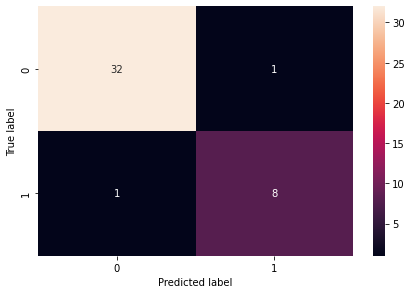

In [85]:
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df)
f = sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_test,y_predicted)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_test,y_predicted)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_test, y_predicted, multi_class="ovr") )

**Evaluating the training done on the Top 3 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 1.137984700000004 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


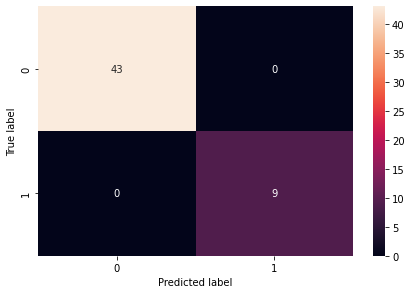

In [86]:
cm1 = confusion_matrix(y_f1, y_predicted1)
cm_df1 = pd.DataFrame(cm1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df1)
f = sns.heatmap(cm1, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm1)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f1,y_predicted1)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f1,y_predicted1)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f1, y_predicted1, multi_class="ovr") )

**Evaluating the training done on the Top 5 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 1.143188699999996 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


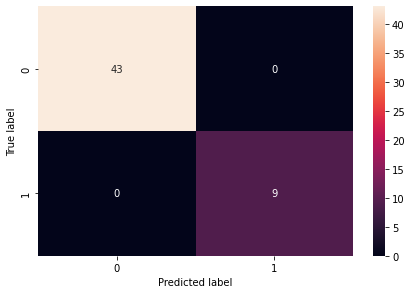

In [87]:
cm2 = confusion_matrix(y_f2, y_predicted2)
cm_df2 = pd.DataFrame(cm2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df2)
f = sns.heatmap(cm2, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm2)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f2,y_predicted2)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f2,y_predicted2)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f2, y_predicted2, multi_class="ovr") )

**Evaluating the training done on the Top 7 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 1.1629708999999906 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


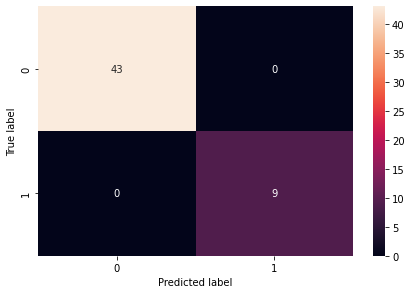

In [88]:
cm3 = confusion_matrix(y_f3, y_predicted3)
cm_df3 = pd.DataFrame(cm3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df3)
f = sns.heatmap(cm3, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end3 - start3,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm3)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f3,y_predicted3)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f3,y_predicted3)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f3, y_predicted3, multi_class="ovr") )

**Evaluating the training done on the Top 10 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 1.1515655999999979 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


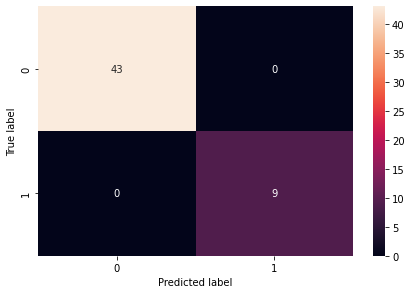

In [89]:
cm4 = confusion_matrix(y_f44, y_predicted4)
cm_df4 = pd.DataFrame(cm4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df4)
f = sns.heatmap(cm4, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end4 - start4,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm4)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f44,y_predicted4)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f44,y_predicted4)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f44, y_predicted4, multi_class="ovr") )

**Evaluating the training done on the Top 3 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   6                   3
Training duration: 1.9433726999999976 seconds
--------------------------------------------------------------
True Positives: 3
True Negatives: 43
False Positives: 0
False Negatives: 6
--------------------------------------------------
Accuracy: 0.88
Mis-Classification: 0.12
Sensitivity: 0.33
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.5
--------------------------------------------------------------
Accuracy: 88.46153846153845 %
Root Mean Square Error: 33.96831102433787 %
ROC AUC Score: 0.6666666666666666


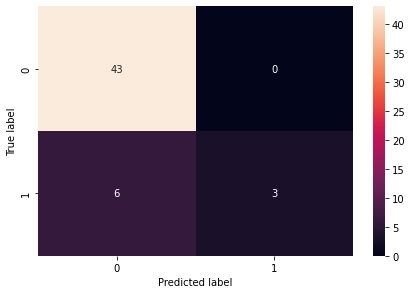

In [90]:
cm5 = confusion_matrix(y_r1, y_predicted5)
cm_df5 = pd.DataFrame(cm5, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df5)
f = sns.heatmap(cm5, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end5 - start5,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm5)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r1,y_predicted5)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r1,y_predicted5)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r1, y_predicted5, multi_class="ovr") )

**Evaluating the training done on the Top 5 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   3                   6
Training duration: 1.9484953999999988 seconds
--------------------------------------------------------------
True Positives: 6
True Negatives: 43
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.67
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.8
--------------------------------------------------------------
Accuracy: 94.23076923076923 %
Root Mean Square Error: 24.019223070763072 %
ROC AUC Score: 0.8333333333333333


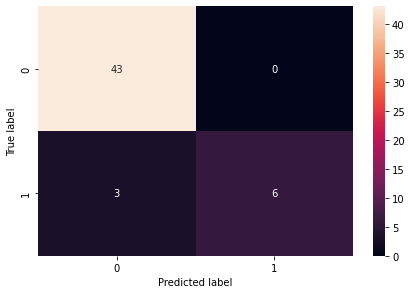

In [91]:
cm6 = confusion_matrix(y_r2, y_predicted6)
cm_df6 = pd.DataFrame(cm6, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df6)
f = sns.heatmap(cm6, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end6 - start6,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm6)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r2,y_predicted6)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r2,y_predicted6)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r2, y_predicted6, multi_class="ovr") )

**Evaluating the training done on the Top 7 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   2                   7
Training duration: 2.0029591999999923 seconds
--------------------------------------------------------------
True Positives: 7
True Negatives: 43
False Positives: 0
False Negatives: 2
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.78
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.88
--------------------------------------------------------------
Accuracy: 96.15384615384616 %
Root Mean Square Error: 19.611613513818405 %
ROC AUC Score: 0.8888888888888888


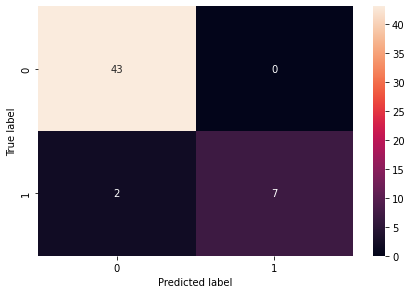

In [92]:
cm7 = confusion_matrix(y_r3, y_predicted7)
cm_df7 = pd.DataFrame(cm7, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df7)
f = sns.heatmap(cm7, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end7 - start7,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm7)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r3,y_predicted7)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r3,y_predicted7)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r3, y_predicted7, multi_class="ovr") )

**Evaluating the training done on the Top 10 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  42                   1
Actual Positive                   0                   9
Training duration: 2.0214088000000032 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 42
False Positives: 1
False Negatives: 0
--------------------------------------------------
Accuracy: 0.98
Mis-Classification: 0.02
Sensitivity: 1.0
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.99
--------------------------------------------------------------
Accuracy: 98.07692307692307 %
Root Mean Square Error: 13.867504905630728 %
ROC AUC Score: 0.9883720930232558


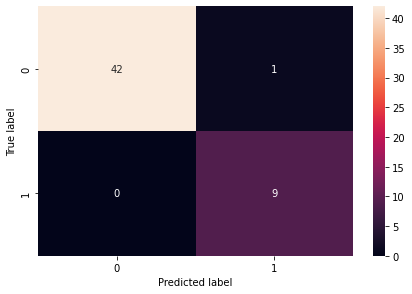

In [93]:
cm8 = confusion_matrix(y_r4, y_predicted8)
cm_df8 = pd.DataFrame(cm8, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df8)
f = sns.heatmap(cm8, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end8 - start8,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm8)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r4,y_predicted8)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r4,y_predicted8)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r4, y_predicted8, multi_class="ovr") )

>### Step 5: Implementing k-nearest neighbor's algorithm(When K = 5)  : Model Training



**Training on the overall unselected splitted dataset** 

In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk = timer()
KNN_5.fit(X_train, y_train)
endk = timer()
y_predictedk = KNN_5.predict(X_test)

**Training on the Top 3 selected(By Forward selection) splitted feature dataset** 

In [95]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk1 = timer()
KNN_5.fit(X_trainf1, y_trainf1)
endk1 = timer()
y_predictedk1 = KNN_5.predict(x_f1)

**Training on the Top 5 selected(By Forward selection) splitted feature dataset** 

In [96]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk2 = timer()
KNN_5.fit(X_trainf2, y_trainf2)
endk2 = timer()
y_predictedk2 = KNN_5.predict(x_f2)

**Training on the Top 7 selected(By Forward selection) splitted feature dataset** 

In [97]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk3 = timer()
KNN_5.fit(X_trainf3, y_trainf3)
endk3 = timer()
y_predictedk3 = KNN_5.predict(x_f3)

**Training on the Top 10 selected(By Forward selection) splitted feature dataset** 

In [98]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk4 = timer()
KNN_5.fit(X_trainf44, y_trainf44)
endk4 = timer()
y_predictedk4 = KNN_5.predict(x_f44)

**Training on the Top 3 selected(By Random Forest Importance) splitted feature dataset** 

In [99]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk5 = timer()
KNN_5.fit(X_trainr1, y_trainr1)
endk5 = timer()
y_predictedk5 = KNN_5.predict(x_r1)

**Training on the Top 5 selected(By Random Forest Importance) splitted feature dataset** 

In [100]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk6 = timer()
KNN_5.fit(X_trainr2, y_trainr2)
endk6 = timer()
y_predictedk6 = KNN_5.predict(x_r2)

**Training on the Top 7 selected(By Random Forest Importance) splitted feature dataset** 

In [101]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk7 = timer()
KNN_5.fit(X_trainr3, y_trainr3)
endk7 = timer()
y_predictedk7 = KNN_5.predict(x_r3)

**Training on the Top 10 selected(By Random Forest Importance) splitted feature dataset** 

In [102]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
startk8 = timer()
KNN_5.fit(X_trainr4, y_trainr4)
endk8 = timer()
y_predictedk8 = KNN_5.predict(x_r4)

>### Step 6: Evaluating the performance of the k-nearest neighbor's algorithm : When K = 5

**Evaluating the training done on an unselected dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  33                   0
Actual Positive                   9                   0
Training duration: 0.0017634000000015249 seconds
--------------------------------------------------------------
True Positives: 0
True Negatives: 33
False Positives: 0
False Negatives: 9
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
--------------------------------------------------------------
Accuracy: 78.57142857142857 %
Root Mean Square Error: 46.29100498862757 %
ROC AUC Score: 0.5


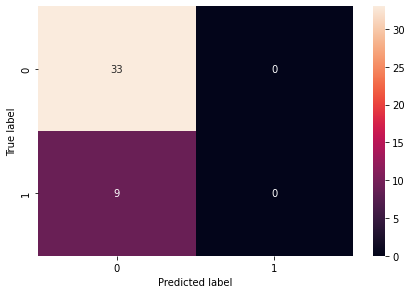

In [103]:
cmu = confusion_matrix(y_test, y_predictedk)
cm_dfu = pd.DataFrame(cmu, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfu)
f = sns.heatmap(cmu, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk - startk,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmu)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_test,y_predictedk)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_test,y_predictedk)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_test, y_predictedk, multi_class="ovr") )

**Evaluating the training done on the Top 3 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 0.0013119999999986476 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


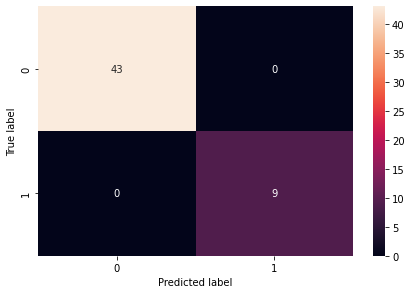

In [104]:
cmf1 = confusion_matrix(y_f1, y_predictedk1)
cm_dff1 = pd.DataFrame(cmf1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff1)
f = sns.heatmap(cmf1, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk1 - startk1,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf1)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f1,y_predictedk1)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f1,y_predictedk1)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f1, y_predictedk1, multi_class="ovr") )

**Evaluating the training done on the Top 5 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 0.0013731000000092308 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


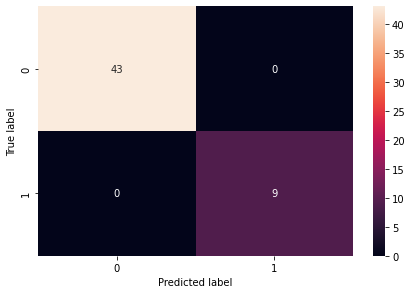

In [105]:
cmf2 = confusion_matrix(y_f2, y_predictedk2)
cm_dff2 = pd.DataFrame(cmf2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff2)
f = sns.heatmap(cmf2, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk2 - startk2,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf2)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f2,y_predictedk2)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f2,y_predictedk2)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f2, y_predictedk2, multi_class="ovr") )

**Evaluating the training done on the Top 7 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 0.0012901000000056229 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


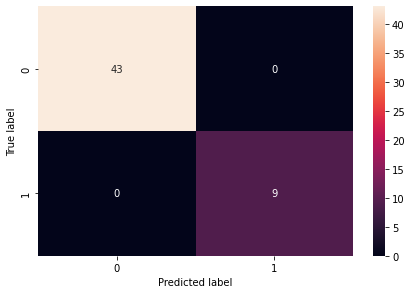

In [106]:
cmf3 = confusion_matrix(y_f3, y_predictedk3)
cm_dff3 = pd.DataFrame(cmf3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff3)
f = sns.heatmap(cmf3, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk3 - startk3,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf3)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f3,y_predictedk3)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f3,y_predictedk3)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f3, y_predictedk3, multi_class="ovr") )

**Evaluating the training done on the Top 10 selected(By Forward selection) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   0                   9
Training duration: 0.0012484999999884394 seconds
--------------------------------------------------------------
True Positives: 9
True Negatives: 43
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
--------------------------------------------------------------
Accuracy: 100.0 %
Root Mean Square Error: 0.0 %
ROC AUC Score: 1.0


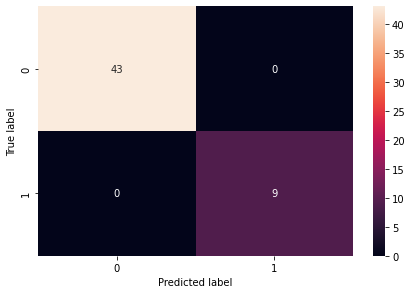

In [107]:
cmf4 = confusion_matrix(y_f44, y_predictedk4)
cm_dff4 = pd.DataFrame(cmf4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff4)
f = sns.heatmap(cmf4, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk4 - startk4,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf4)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_f44,y_predictedk4)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_f44,y_predictedk4)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_f44, y_predictedk4, multi_class="ovr") )

**Evaluating the training done on the Top 3 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   9                   0
Training duration: 0.0013466999999991458 seconds
--------------------------------------------------------------
True Positives: 0
True Negatives: 43
False Positives: 0
False Negatives: 9
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
--------------------------------------------------------------
Accuracy: 82.6923076923077 %
Root Mean Square Error: 41.60251471689219 %
ROC AUC Score: 0.5


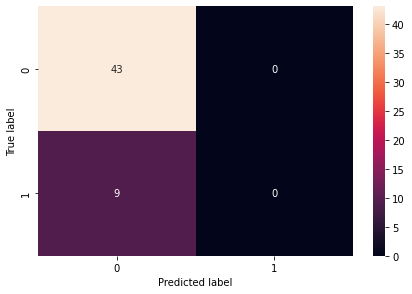

In [108]:
cmr1 = confusion_matrix(y_r1, y_predictedk5)
cm_dfr1 = pd.DataFrame(cmr1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr1)
f = sns.heatmap(cmr1, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk5 - startk5,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr1)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r1,y_predictedk5)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r1,y_predictedk5)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r1, y_predictedk5, multi_class="ovr") )

**Evaluating the training done on the Top 5 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   9                   0
Training duration: 0.0013334000000071455 seconds
--------------------------------------------------------------
True Positives: 0
True Negatives: 43
False Positives: 0
False Negatives: 9
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
--------------------------------------------------------------
Accuracy: 82.6923076923077 %
Root Mean Square Error: 41.60251471689219 %
ROC AUC Score: 0.5


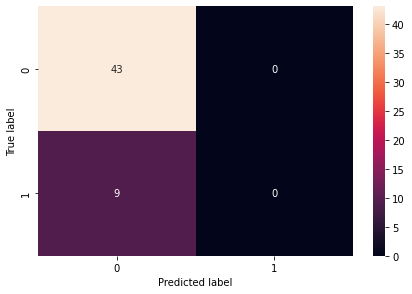

In [109]:
cmr2 = confusion_matrix(y_r2, y_predictedk6)
cm_dfr2 = pd.DataFrame(cmr2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr2)
f = sns.heatmap(cmr2, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk6 - startk6,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr2)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r2,y_predictedk6)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r2,y_predictedk6)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r2, y_predictedk6, multi_class="ovr") )

**Evaluating the training done on the Top 7 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   9                   0
Training duration: 0.0020590999999967607 seconds
--------------------------------------------------------------
True Positives: 0
True Negatives: 43
False Positives: 0
False Negatives: 9
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
--------------------------------------------------------------
Accuracy: 82.6923076923077 %
Root Mean Square Error: 41.60251471689219 %
ROC AUC Score: 0.5


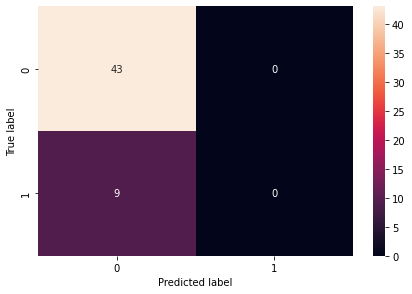

In [110]:
cmr3 = confusion_matrix(y_r3, y_predictedk7)
cm_dfr3 = pd.DataFrame(cmr3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr3)
f = sns.heatmap(cmr3, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk7 - startk7,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr3)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r3,y_predictedk7)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r3,y_predictedk7)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r3, y_predictedk7, multi_class="ovr") )

**Evaluating the training done on the Top 10 selected(By Random Forest Importance) splitted feature dataset**

                 Predicted Negative  Predicted Positive
Actual Negative                  43                   0
Actual Positive                   9                   0
Training duration: 0.002059299999999098 seconds
--------------------------------------------------------------
True Positives: 0
True Negatives: 43
False Positives: 0
False Negatives: 9
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
--------------------------------------------------------------
Accuracy: 82.6923076923077 %
Root Mean Square Error: 41.60251471689219 %
ROC AUC Score: 0.5


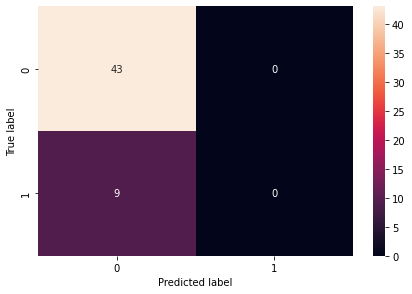

In [111]:
cmr4 = confusion_matrix(y_r4, y_predictedk8)
cm_dfr4 = pd.DataFrame(cmr4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr4)
f = sns.heatmap(cmr4, annot=True, fmt='d')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',endk8 - startk8,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr4)
print("--------------------------------------------------------------")
print('Accuracy:',accuracy(y_r4,y_predictedk8)[0]*100,"%")
print('Root Mean Square Error:', accuracy(y_r4,y_predictedk8)[1]*100,"%")
print('ROC AUC Score:',roc_auc_score(y_r4, y_predictedk8, multi_class="ovr") )

>## Step 7: Performing K-Cross Validation in our dataset

In [112]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,independent,target,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()*100))

Cross Validation Scores are [0.97619048 0.92857143 0.97560976 0.97560976 1.        ]
Average Cross Validation score :97.11962833914055


# Exploring the Data

>## Checking the relationships of features

In [113]:
data_clean.head()

Com­ments ad­ded    Shares  Dis­likes     Likes  Sub­scribers lost  \
5           2.417304  0.737024   1.039141  0.516237           0.517071   
6           2.375894 -1.234252  -0.433377 -0.791629           0.890334   
8           2.185292  1.954093   1.907650  0.578042           1.839669   
9           2.094741 -0.716330   0.238917 -0.489976           0.680514   
10          2.072084  1.576917   1.199537  1.719203          -0.184757   

    Sub­scribers gained  RPM (USD)  CPM (USD)  \
5              0.498250  -0.854508  -1.490875   
6             -1.304744  -1.375576  -2.281520   
8              0.946599   1.376771  -0.585928   
9             -0.706821  -1.237688  -2.462570   
10             1.526839   0.889133   0.480759   

    Av­er­age per­cent­age viewed (%)     Views  Watch time (hours)  \
5                           -1.835757  0.441055            0.695476   
6                           -1.756964 -1.063979           -0.424760   
8                           -1.838571  0.780453            0.811052   
9                           -1.936727 -0.658567           -0.213646   
10                          -0.642243  1.830935            2.263957   

    Sub­scribers  Im­pres­sions  Im­pres­sions click-through rate (%)  weight  
5            150       0.372424                              0.350314       0  
6             -5      -0.230748                             -1.637428       0  
8            297       1.996914                             -1.408026       1  
9             13      -0.152396                             -1.263878       0  
10           911       1.465755                              1.973257       1

Text(0.5, 1.0, 'Watch time (hours) VS Subscribers ')

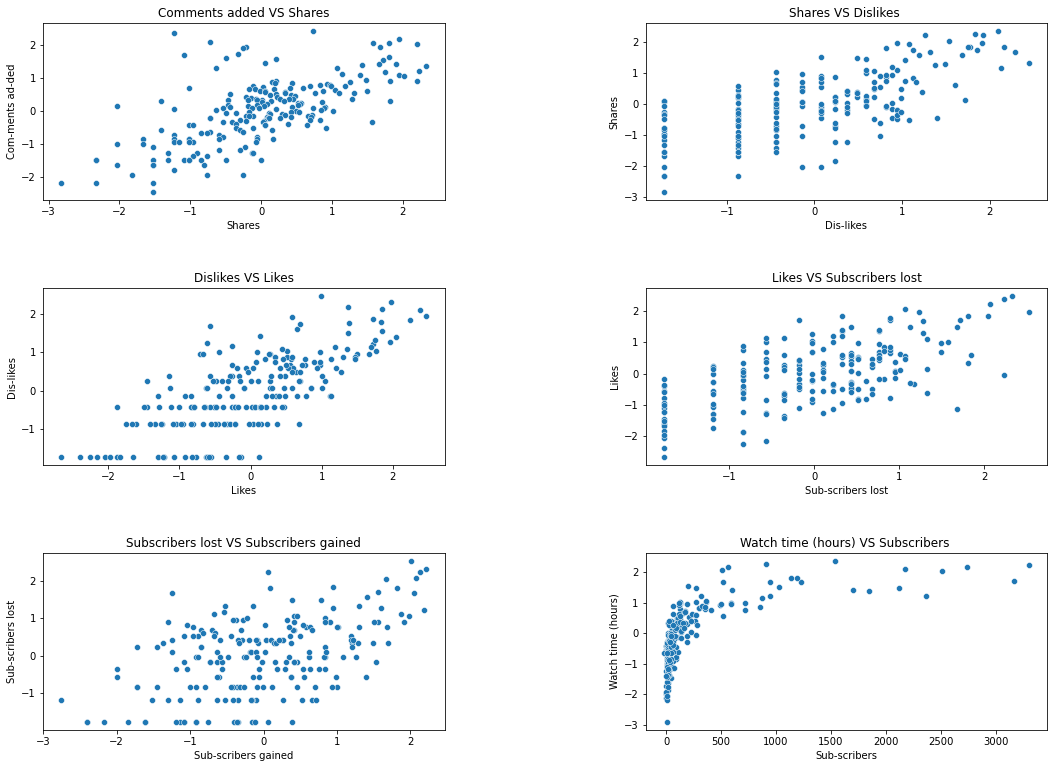

In [114]:
fig,ax=plt.subplots(3,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax=ax.flatten()
sns.scatterplot(y=data_clean["Com­ments ad­ded"],x=data_clean["Shares"],ax=ax[0])
sns.scatterplot(y=data_clean["Shares"],x=data_clean["Dis­likes"],ax=ax[1])
sns.scatterplot(y=data_clean["Dis­likes"],x=data_clean["Likes"],ax=ax[2])
sns.scatterplot(y=data_clean["Likes"],x=data_clean["Sub­scribers lost"],ax=ax[3])
sns.scatterplot(y=data_clean["Sub­scribers lost"],x=data_clean["Sub­scribers gained"],ax=ax[4])
sns.scatterplot(y=data_clean["Watch time (hours)"],x=data_clean["Sub­scribers"],ax=ax[5])
ax[0].set_title("Comments added VS Shares")
ax[1].set_title("Shares VS Dislikes ")
ax[2].set_title("Dislikes VS Likes")
ax[3].set_title("Likes VS Subscribers lost")
ax[4].set_title("Subscribers lost VS Subscribers gained")
ax[5].set_title("Watch time (hours) VS Subscribers ")

Text(0.5, 1.0, 'Impressions VS Impressions click-through rate (%) ')

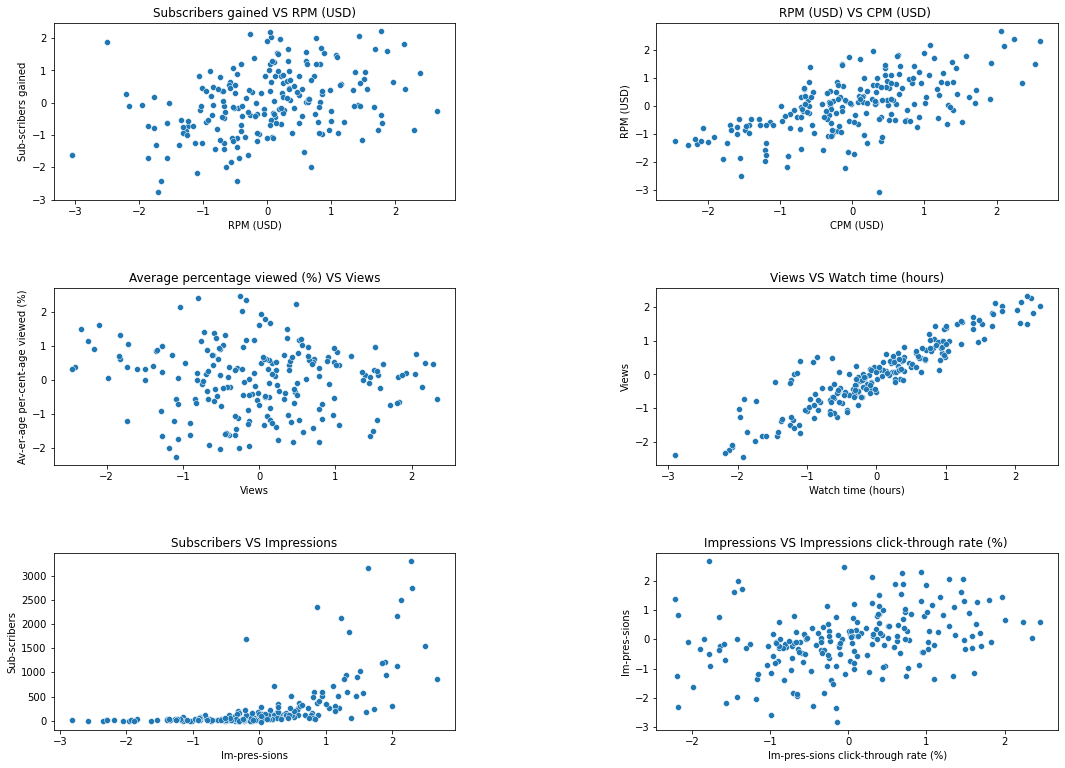

In [115]:
fig,ax=plt.subplots(3,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax=ax.flatten()
sns.scatterplot(y=data_clean["Sub­scribers gained"],x=data_clean["RPM (USD)"],ax=ax[0])
sns.scatterplot(y=data_clean["RPM (USD)"],x=data_clean["CPM (USD)"],ax=ax[1])
sns.scatterplot(y=data_clean["Av­er­age per­cent­age viewed (%)"],x=data_clean["Views"],ax=ax[2])
sns.scatterplot(y=data_clean["Views"],x=data_clean["Watch time (hours)"],ax=ax[3])
sns.scatterplot(y=data_clean["Sub­scribers"],x=data_clean["Im­pres­sions"],ax=ax[4])
sns.scatterplot(y=data_clean["Im­pres­sions"],x=data_clean["Im­pres­sions click-through rate (%)"],ax=ax[5])
ax[0].set_title("Subscribers gained VS RPM (USD)")
ax[1].set_title("RPM (USD) VS CPM (USD) ")
ax[2].set_title("Average percentage viewed (%) VS Views")
ax[3].set_title("Views VS Watch time (hours)")
ax[4].set_title("Subscribers VS Impressions")
ax[5].set_title("Impressions VS Impressions click-through rate (%) ")

These charts demonstrate that the relationship between the columns is quite nonlinear.